In [1]:
import pandas as pd
import numpy as np
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_raw = pd.read_csv('henry/henry.csv')

In [3]:
df_raw.head()

,index,traffic_day,data_capture_key,publisher,vendor_name,vendor_key,shipped_leads,revenue,adjrev
0,0,2018-03-16,27395740122,epcvip_PL,Accredited Debt Relief,15452310,1,7.5,7.50
1,1,2018-03-16,27395740922,LeadGroup_Direct_PL,Accredited Debt Relief,15452310,1,7.5,7.50
2,2,2018-03-16,27395743022,suitedconnector_PL,Accredited Debt Relief,15452310,1,3.0,3.00
3,3,2018-03-16,27395745922,Uplift_Email_PL,Accredited Debt Relief,15452310,1,7.5,7.50
4,4,2018-03-16,27395746222,Uplift_Email_PL,LendingPoint LLC,14998410,1,0.0,0.01


In [4]:
vendor_names = set(df_raw[df_raw.columns[4]])
vendor_names = list(vendor_names)
vendor_names

['Prosper Marketplace, Inc',
 'Freedom Debt Relief (Personal Loans)',
 'Accredited Debt Relief',
 'Lending Club',
 'Discover - Personal Loans',
 'Clearlane',
 'Eloan',
 'LoanMart',
 'SOFI',
 'LendingPoint LLC',
 'Finance Factory',
 'National Debt Relief',
 'CashNetUSA',
 'LendingUSA',
 'Net Credit',
 'EPCVIP',
 'CashUSA',
 'Lightstream',
 'Upgrade',
 'Avant Credit',
 'Payoff',
 'OppLoans',
 'Century Support Service',
 'BofI Federal Bank',
 'PL-PersonalLoans.com',
 'Freedom Plus',
 'Marlette Funding (BestEgg)',
 'Upstart',
 'Headway Capital',
 'PL-PersonalLoans.com_unmatched',
 'Goldman Sachs - Marcus',
 'SpringLeaf',
 'LoanMe',
 'Elevate Credit Service',
 'Rapid Advance',
 'First Midwest Bank',
 'ClearOne Advantage_PL',
 'Finova']

In [5]:
vend = vendor_names[0]
df_test = df_raw[df_raw['vendor_name'] == vend]
result = df_test.groupby('traffic_day')['revenue'].agg(['sum','count'])
result['rpl'] = result['sum']/result['count']
result[['rpl']]

,rpl
traffic_day,
2018-03-16,6.555556
2018-03-17,10.117778
2018-03-18,1.019608
2018-03-19,1.748879
2018-03-20,4.994083
2018-03-21,6.551724
2018-03-22,3.657588
2018-03-23,6.956522
2018-03-24,8.175000


In [6]:
daily_vend_revs = {}
for vend in vendor_names:
    df_vend = df_raw[df_raw['vendor_name'] == vend]
    vend_daily = df_vend.groupby('traffic_day')['revenue'].agg(['sum','count'])
    vend_daily['rpl'] = vend_daily['sum']/vend_daily['count']
    daily_vend_revs[vend] = vend_daily[['sum']]

In [7]:
daily_vend_revs.keys()
for key in daily_vend_revs.keys():
    print(key, daily_vend_revs[key].head())

Prosper Marketplace, Inc                  sum
traffic_day         
2018-03-16   1180.00
2018-03-17   1548.02
2018-03-18    156.00
2018-03-19    390.00
2018-03-20   1688.00
Freedom Debt Relief (Personal Loans)                 sum
traffic_day        
2018-03-16   5552.0
2018-03-19   6276.5
2018-03-20   6198.5
2018-03-21   6038.0
2018-03-22   6748.0
Accredited Debt Relief                   sum
traffic_day          
2018-03-16   14389.06
2018-03-17   16574.81
2018-03-18   15529.75
2018-03-19   15693.37
2018-03-20   24730.61
Lending Club                  sum
traffic_day         
2018-03-16   4727.82
2018-03-17   2400.19
2018-03-18   4259.81
2018-03-19   4788.00
2018-03-20   8097.75
Discover - Personal Loans                sum
traffic_day       
2018-03-16   350.0
2018-03-17     0.0
2018-03-18   225.0
2018-03-19     0.0
2018-03-20     0.0
Clearlane                sum
traffic_day       
2018-03-16    70.0
2018-03-17   266.0
2018-03-18   168.0
2018-03-19   224.0
2018-03-20   441.0
Eloan       

Prosper Marketplace, Inc


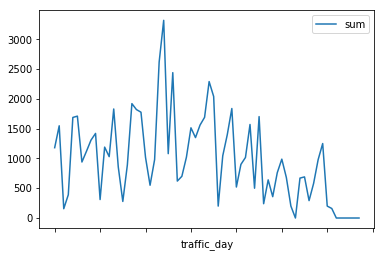

Freedom Debt Relief (Personal Loans)


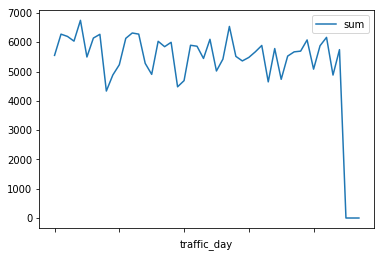

Accredited Debt Relief


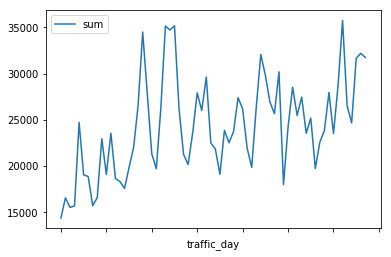

Lending Club


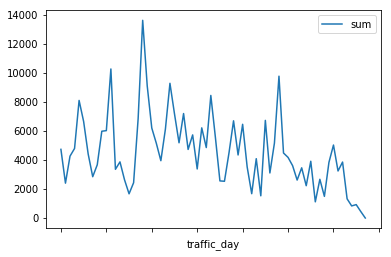

Discover - Personal Loans


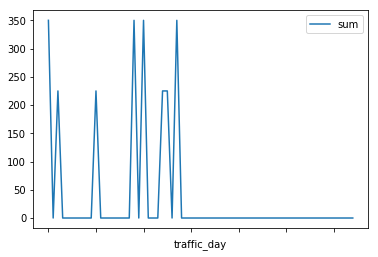

Clearlane


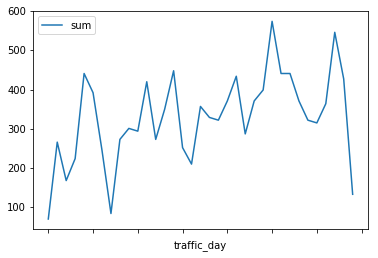

Eloan


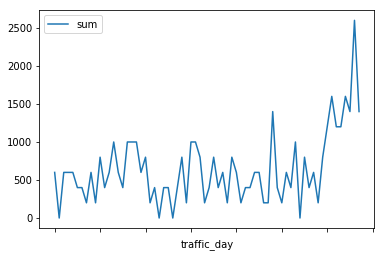

LoanMart


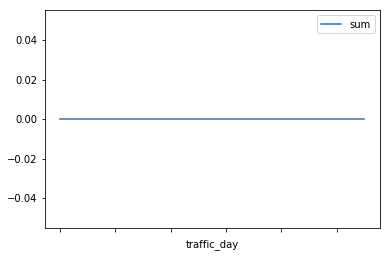

SOFI


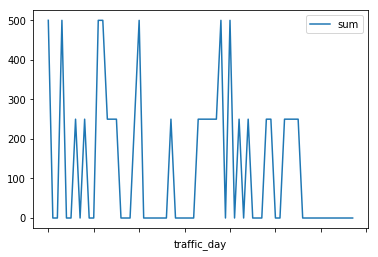

LendingPoint LLC


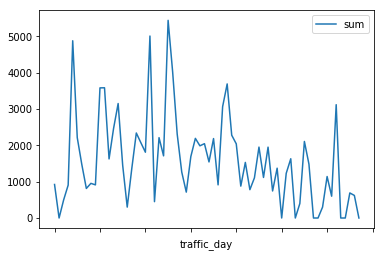

Finance Factory


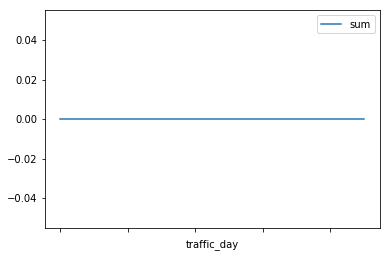

National Debt Relief


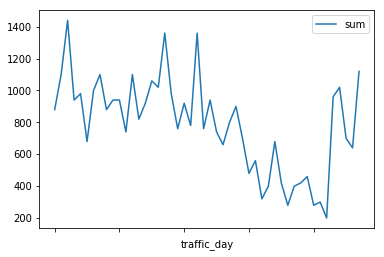

CashNetUSA


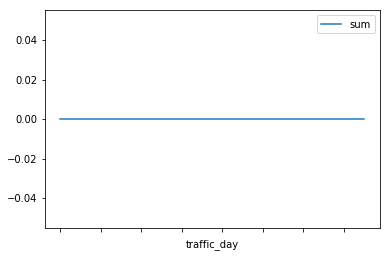

LendingUSA


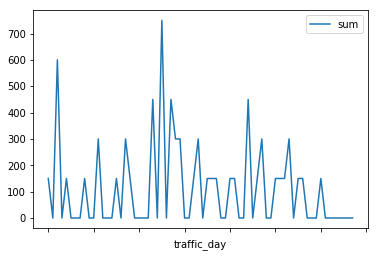

Net Credit


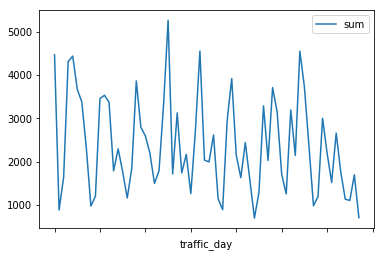

EPCVIP


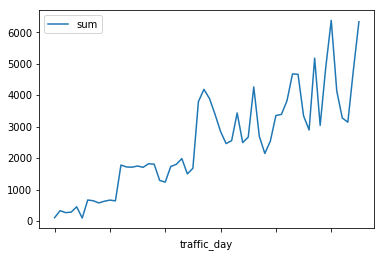

CashUSA


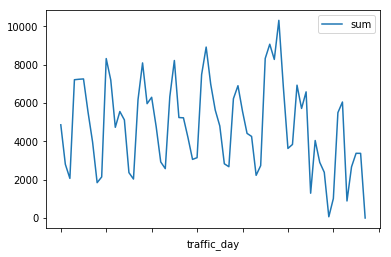

Lightstream


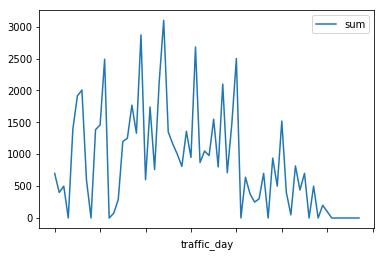

Upgrade


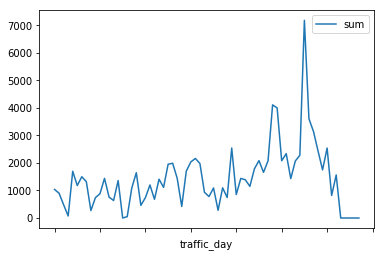

Avant Credit


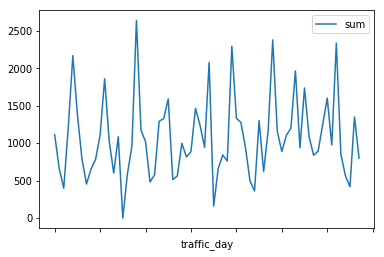

Payoff


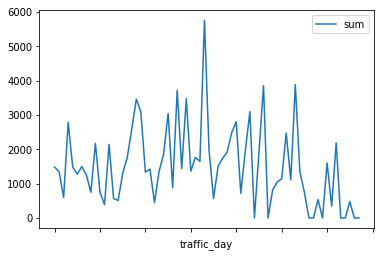

OppLoans


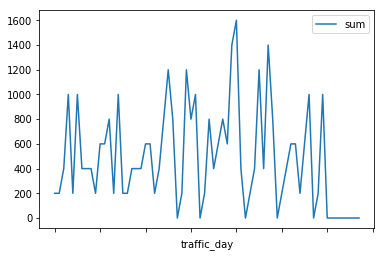

Century Support Service


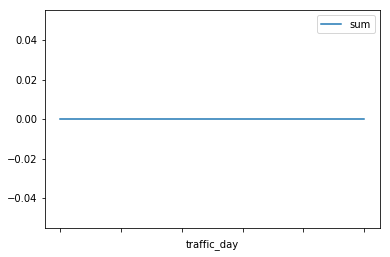

BofI Federal Bank


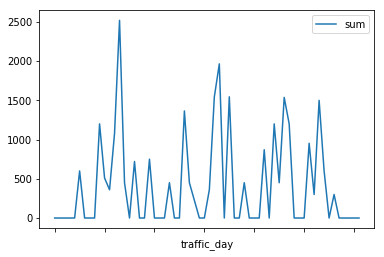

PL-PersonalLoans.com


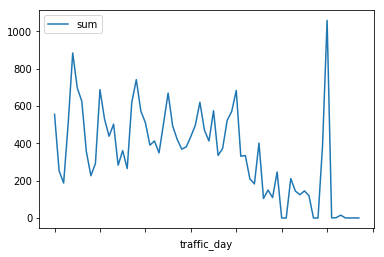

Freedom Plus


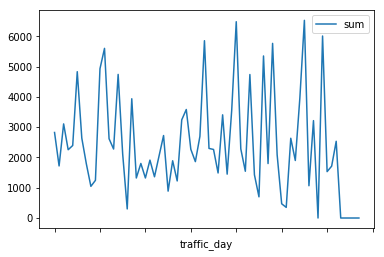

Marlette Funding (BestEgg)


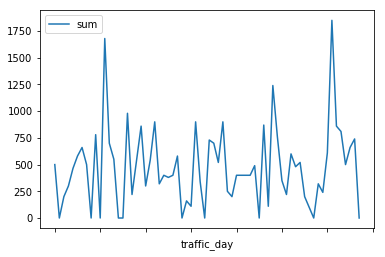

Upstart


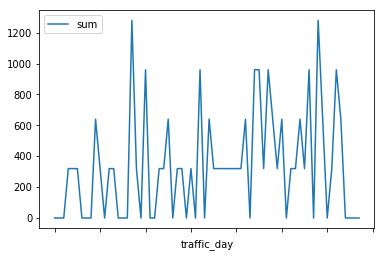

Headway Capital


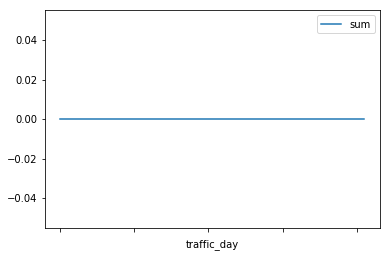

PL-PersonalLoans.com_unmatched


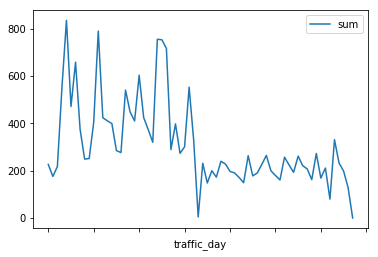

Goldman Sachs - Marcus


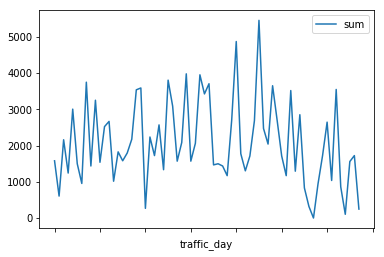

SpringLeaf


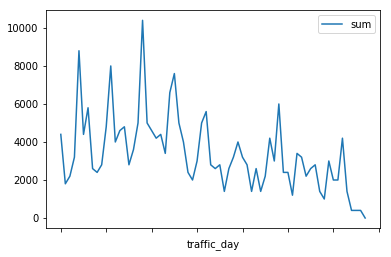

LoanMe


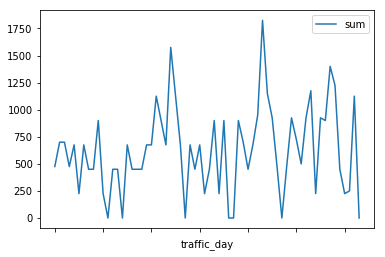

Elevate Credit Service


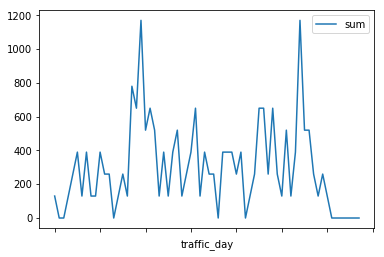

Rapid Advance


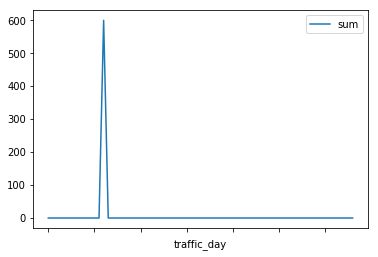

First Midwest Bank


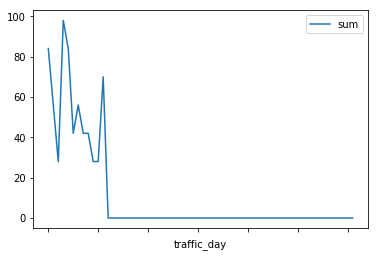

ClearOne Advantage_PL


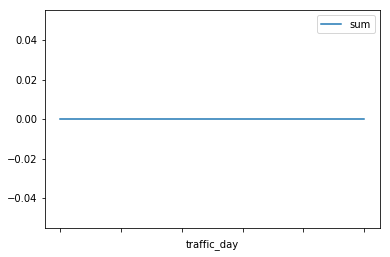

Finova


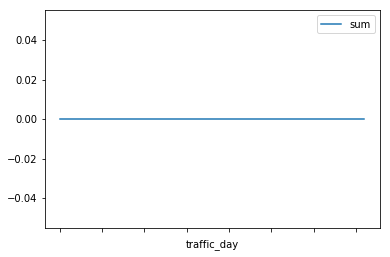

In [8]:
for vend in vendor_names:
    daily_vend_revs[vend].plot()
    print(vend)
    pyplot.show()

Prosper Marketplace, Inc


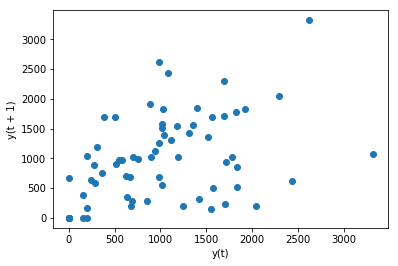

Freedom Debt Relief (Personal Loans)


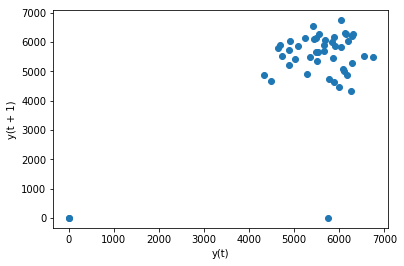

Accredited Debt Relief


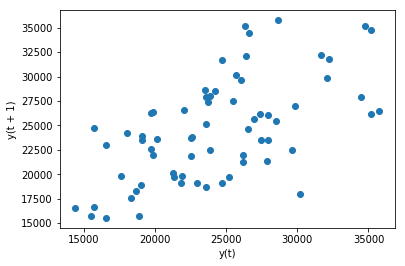

Lending Club


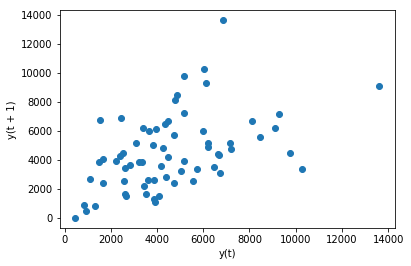

Discover - Personal Loans


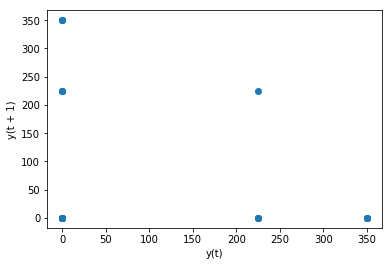

Clearlane


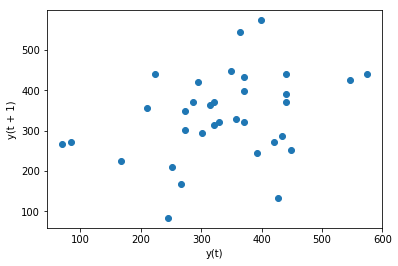

Eloan


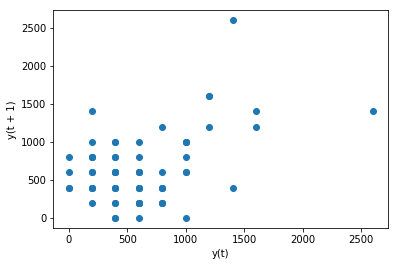

LoanMart


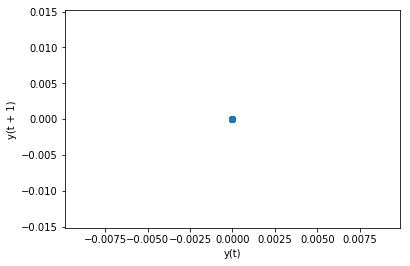

SOFI


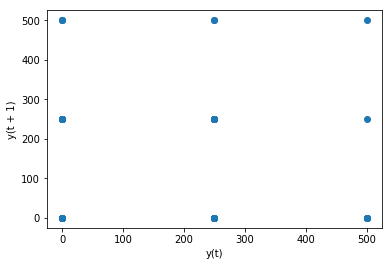

LendingPoint LLC


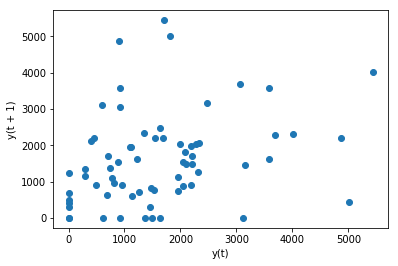

Finance Factory


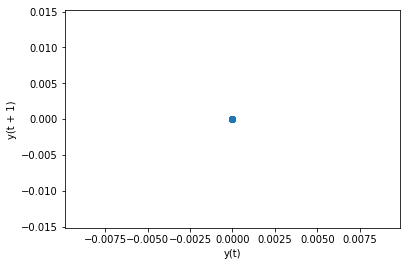

National Debt Relief


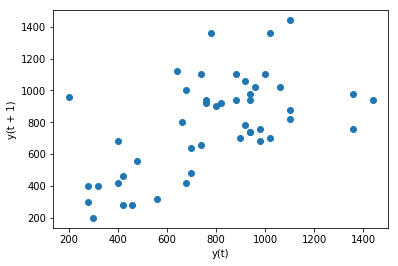

CashNetUSA


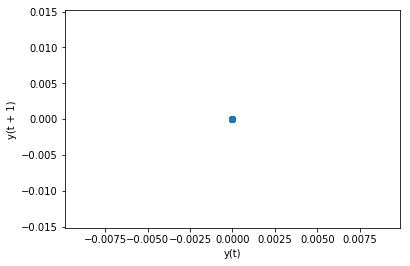

LendingUSA


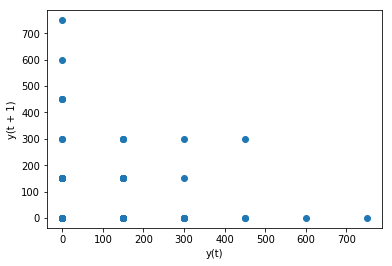

Net Credit


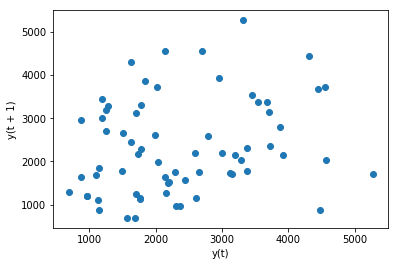

EPCVIP


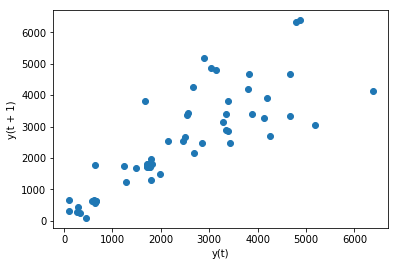

CashUSA


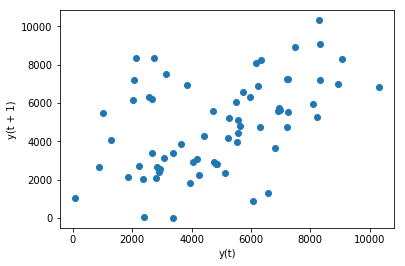

Lightstream


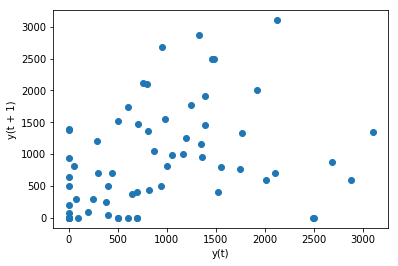

Upgrade


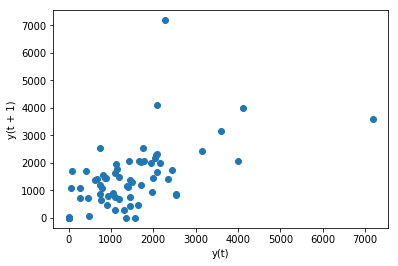

Avant Credit


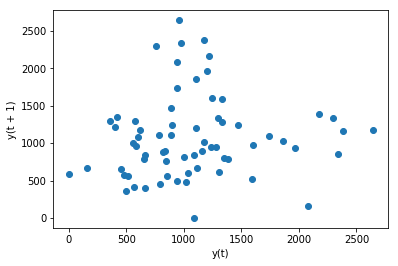

Payoff


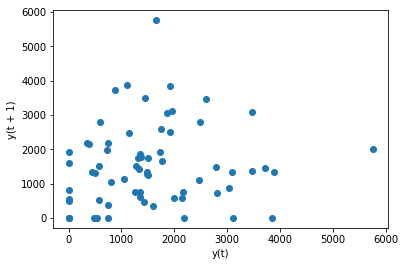

OppLoans


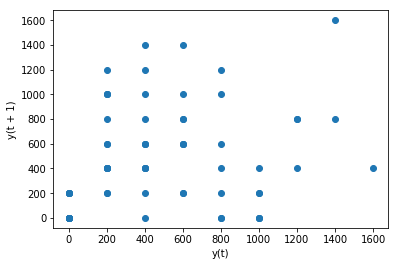

Century Support Service


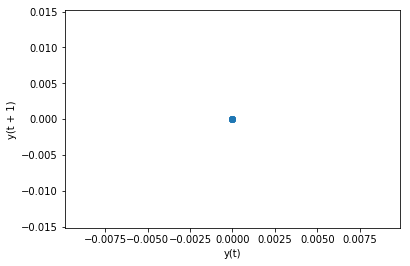

BofI Federal Bank


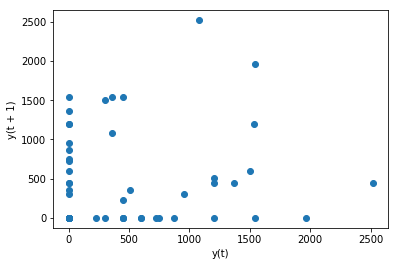

PL-PersonalLoans.com


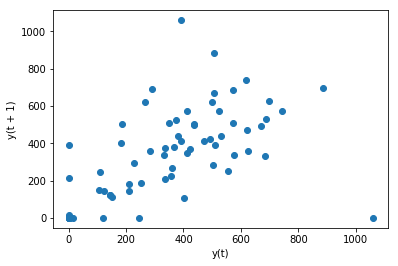

Freedom Plus


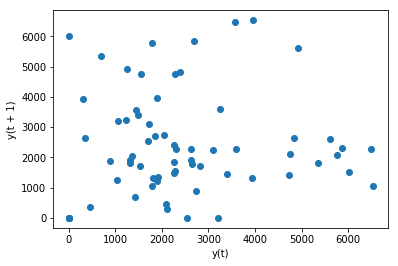

Marlette Funding (BestEgg)


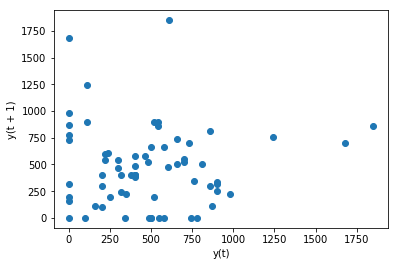

Upstart


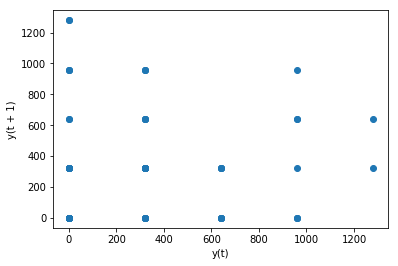

Headway Capital


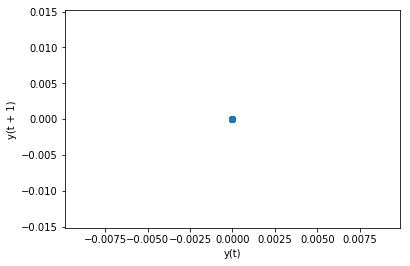

PL-PersonalLoans.com_unmatched


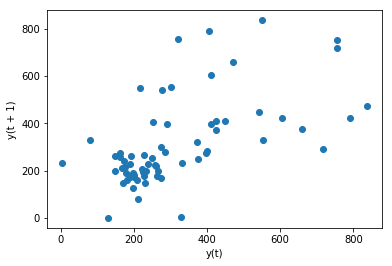

Goldman Sachs - Marcus


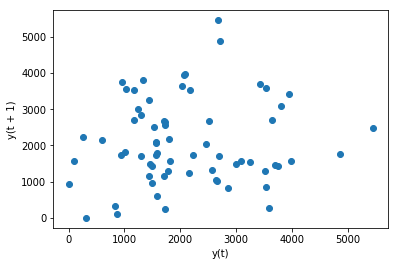

SpringLeaf


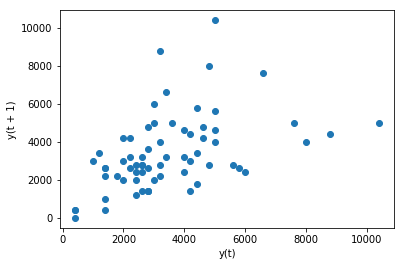

LoanMe


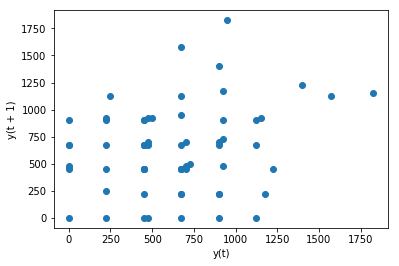

Elevate Credit Service


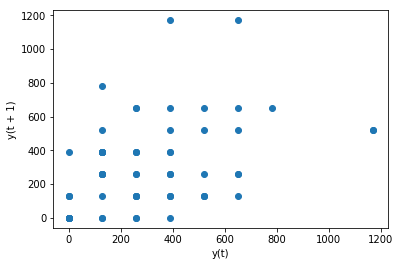

Rapid Advance


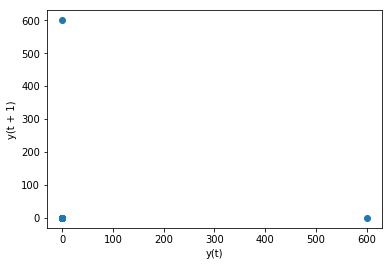

First Midwest Bank


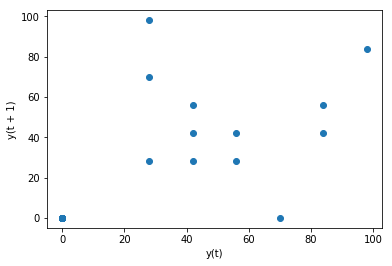

ClearOne Advantage_PL


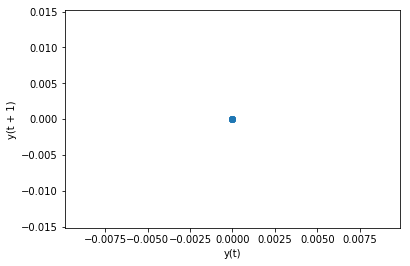

Finova


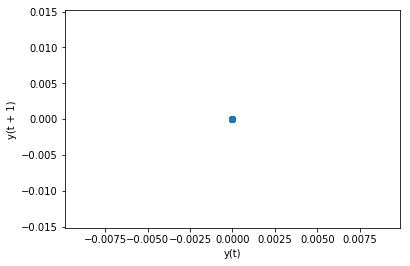

In [9]:
for vend in vendor_names:
    lag_plot(daily_vend_revs[vend])
    print(vend)
    pyplot.show()

Prosper Marketplace, Inc


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


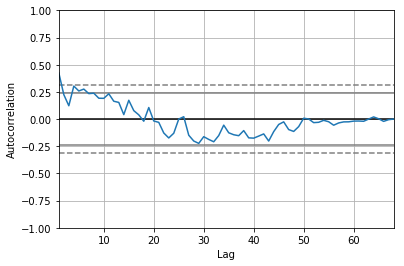

Freedom Debt Relief (Personal Loans)


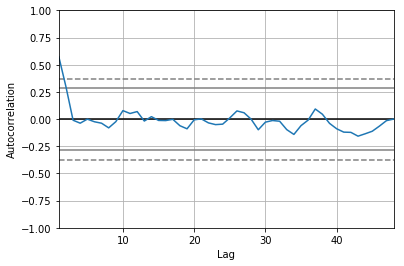

Accredited Debt Relief


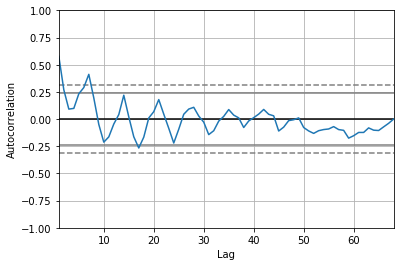

Lending Club


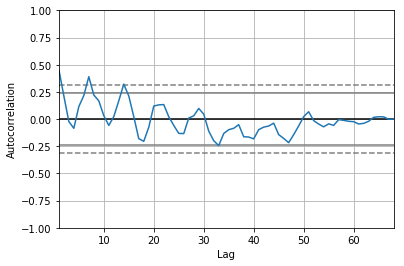

Discover - Personal Loans


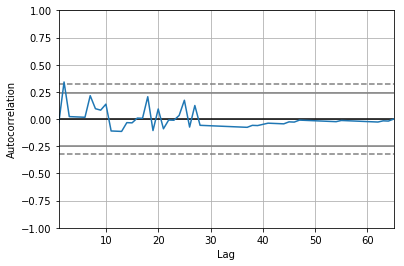

Clearlane


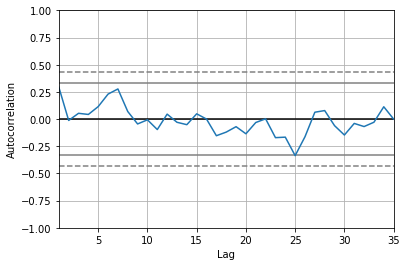

Eloan


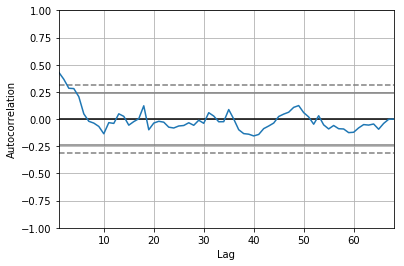

LoanMart


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:557: RuntimeWarning: invalid value encountered in double_scalars
  (data[h:] - mean)).sum() / float(n) / c0


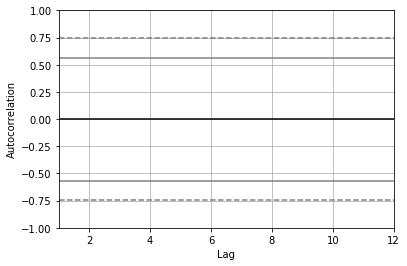

SOFI


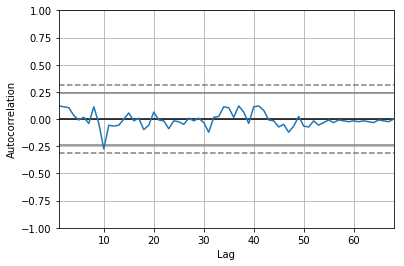

LendingPoint LLC


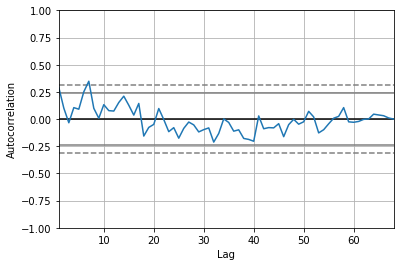

Finance Factory


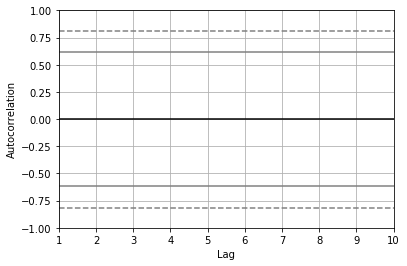

National Debt Relief


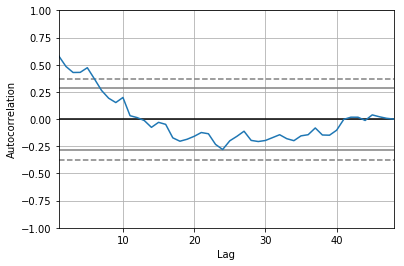

CashNetUSA


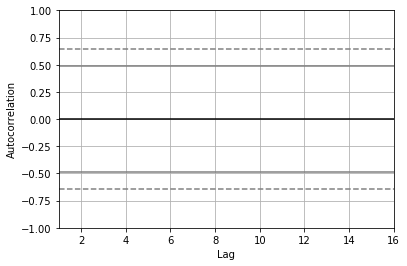

LendingUSA


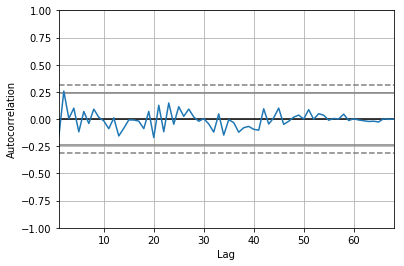

Net Credit


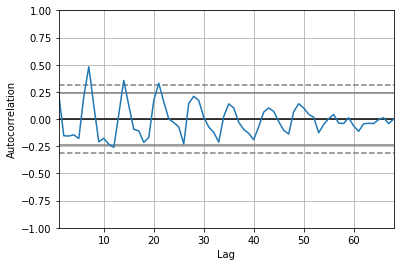

EPCVIP


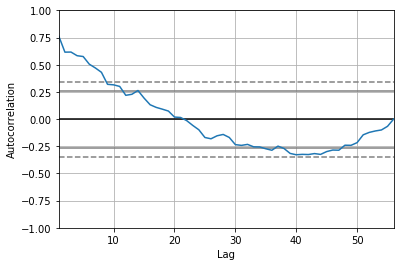

CashUSA


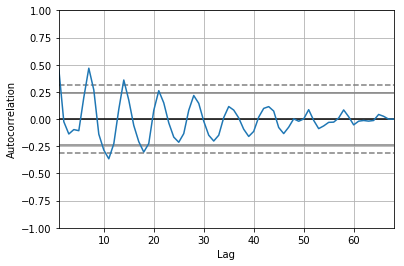

Lightstream


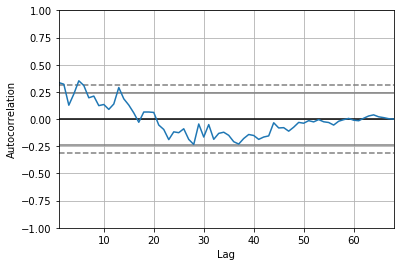

Upgrade


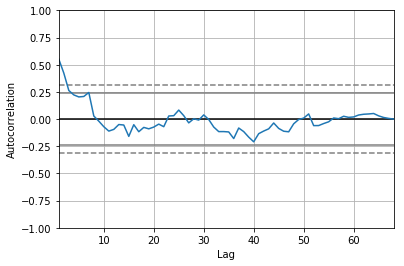

Avant Credit


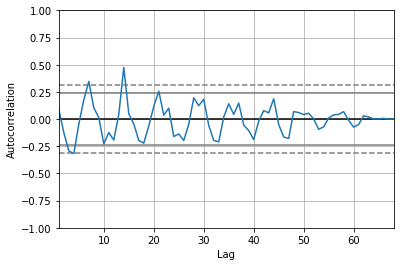

Payoff


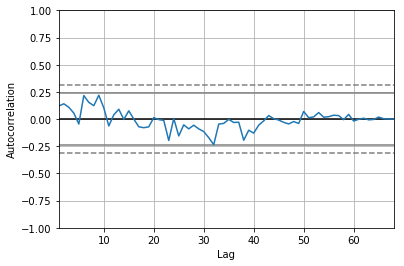

OppLoans


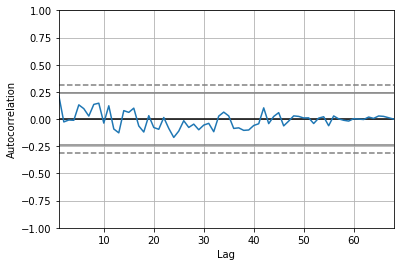

Century Support Service


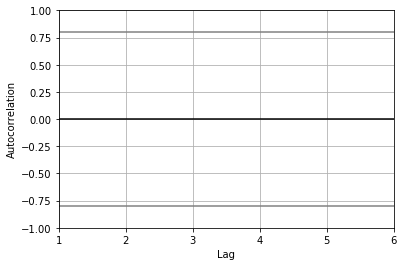

BofI Federal Bank


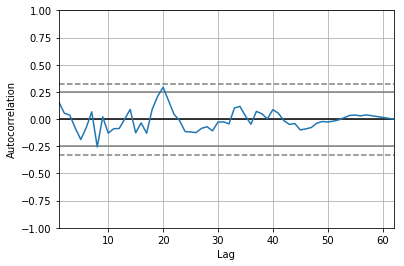

PL-PersonalLoans.com


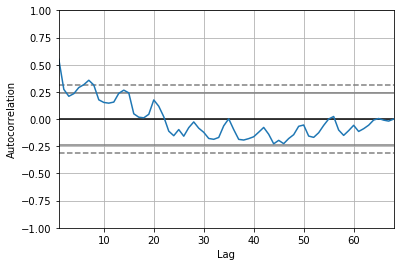

Freedom Plus


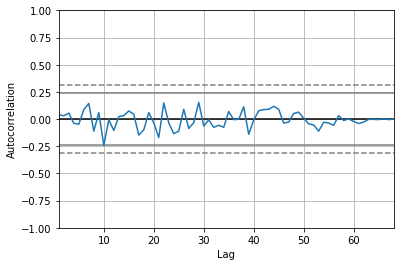

Marlette Funding (BestEgg)


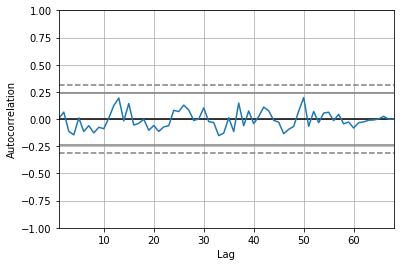

Upstart


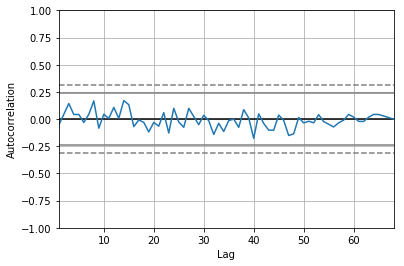

Headway Capital


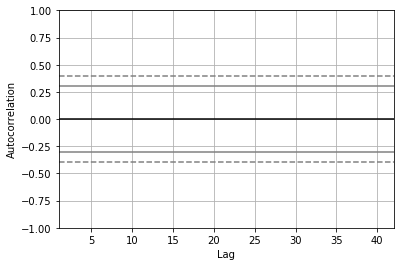

PL-PersonalLoans.com_unmatched


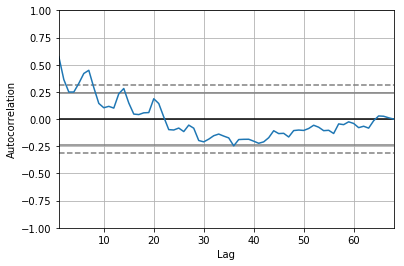

Goldman Sachs - Marcus


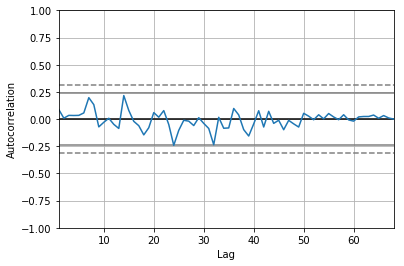

SpringLeaf


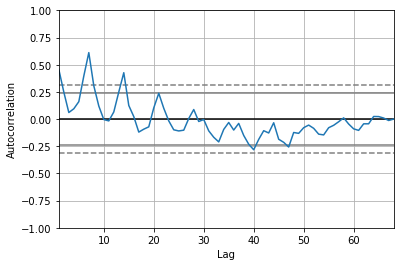

LoanMe


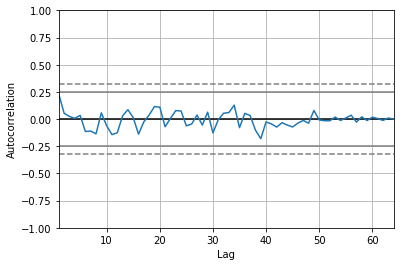

Elevate Credit Service


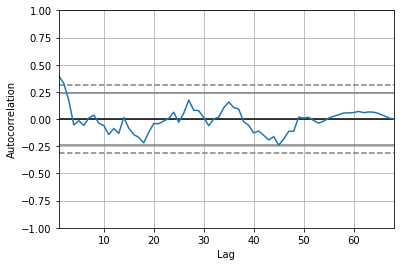

Rapid Advance


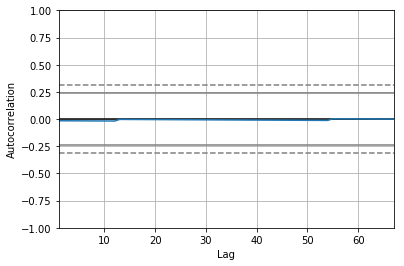

First Midwest Bank


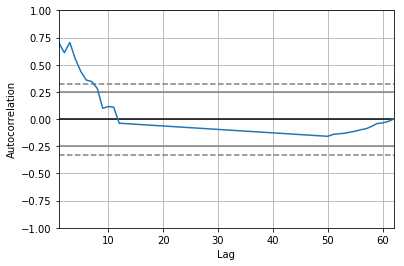

ClearOne Advantage_PL


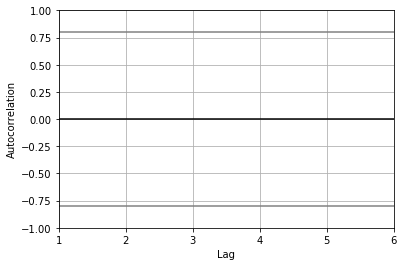

Finova


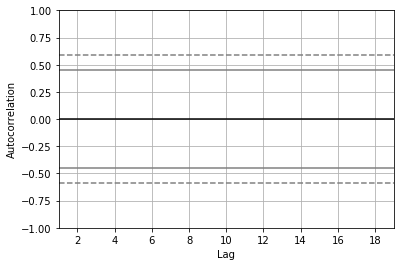

In [10]:
for vend in vendor_names:
    print(vend)
    autocorrelation_plot(daily_vend_revs[vend])
    pyplot.show()

In [11]:
for vend in vendor_names:
    print(vend)
    values = DataFrame(daily_vend_revs[vend].values)
    df = concat([values.shift(1), values], axis=1)
    df.columns = ['t-1','t+1']
    result = df.corr()
    print(result)
    

Prosper Marketplace, Inc
          t-1       t+1
t-1  1.000000  0.430819
t+1  0.430819  1.000000
Freedom Debt Relief (Personal Loans)
          t-1       t+1
t-1  1.000000  0.673489
t+1  0.673489  1.000000
Accredited Debt Relief
          t-1       t+1
t-1  1.000000  0.602497
t+1  0.602497  1.000000
Lending Club
          t-1       t+1
t-1  1.000000  0.468878
t+1  0.468878  1.000000
Discover - Personal Loans
          t-1       t+1
t-1  1.000000 -0.034861
t+1 -0.034861  1.000000
Clearlane
          t-1       t+1
t-1  1.000000  0.330446
t+1  0.330446  1.000000
Eloan
         t-1      t+1
t-1  1.00000  0.43941
t+1  0.43941  1.00000
LoanMart
     t-1  t+1
t-1  NaN  NaN
t+1  NaN  NaN
SOFI
         t-1      t+1
t-1  1.00000  0.12658
t+1  0.12658  1.00000
LendingPoint LLC
          t-1       t+1
t-1  1.000000  0.294499
t+1  0.294499  1.000000
Finance Factory
     t-1  t+1
t-1  NaN  NaN
t+1  NaN  NaN
National Debt Relief
          t-1       t+1
t-1  1.000000  0.588285
t+1  0.588285  1.000000


Prosper Marketplace, Inc


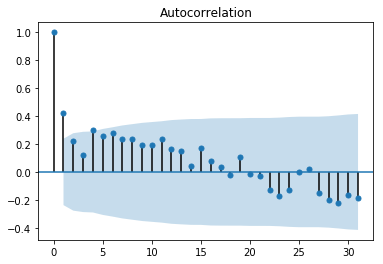

Freedom Debt Relief (Personal Loans)


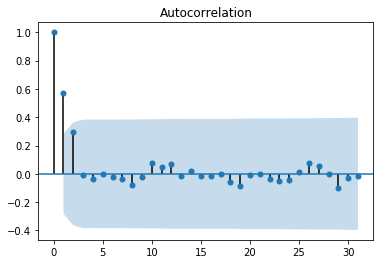

Accredited Debt Relief


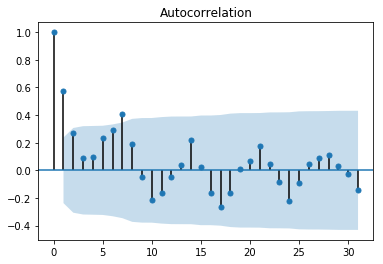

Lending Club


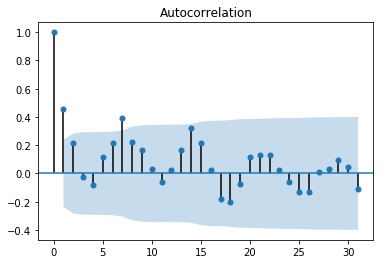

Discover - Personal Loans


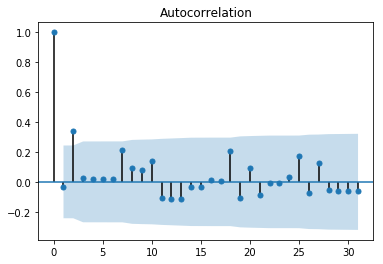

Clearlane


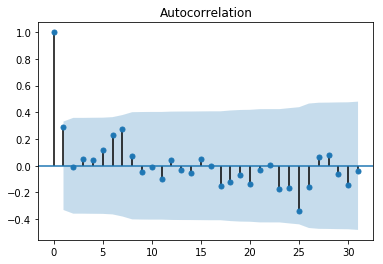

Eloan


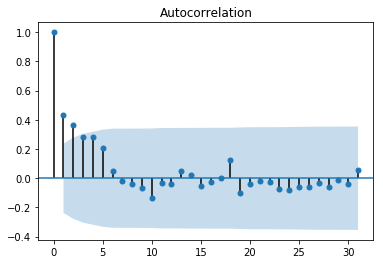

LoanMart
NA
SOFI


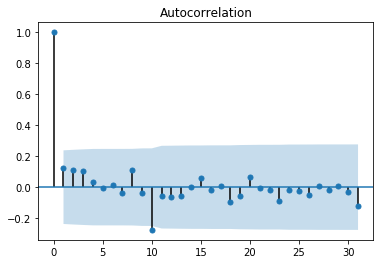

LendingPoint LLC


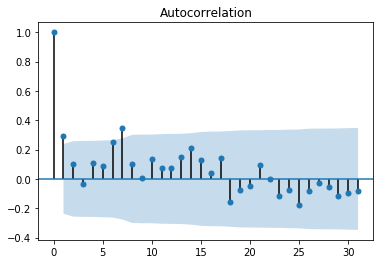

Finance Factory
NA
National Debt Relief


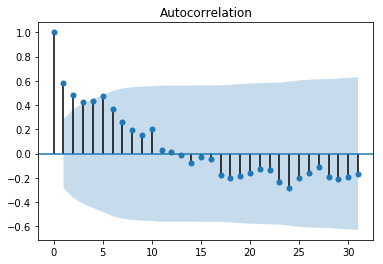

CashNetUSA
NA
LendingUSA


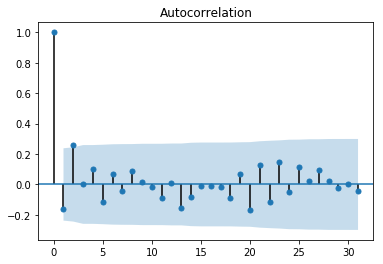

Net Credit


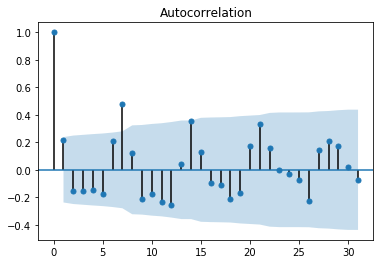

EPCVIP


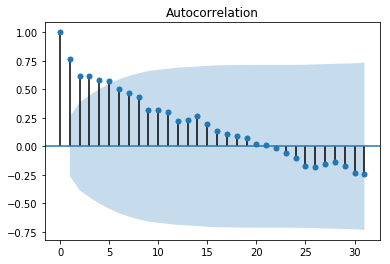

CashUSA


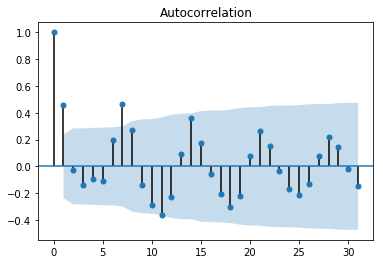

Lightstream


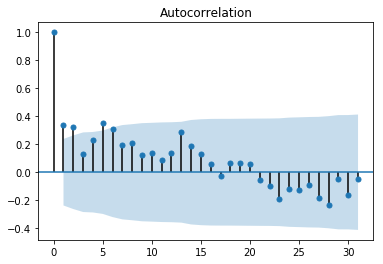

Upgrade


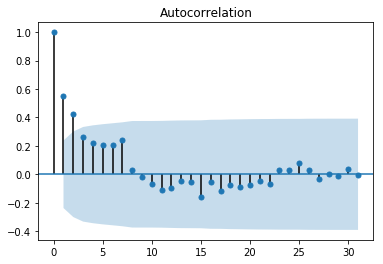

Avant Credit


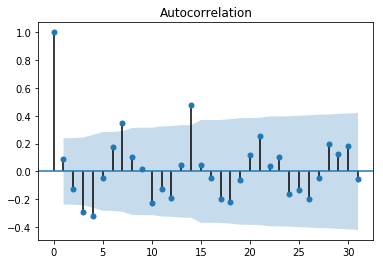

Payoff


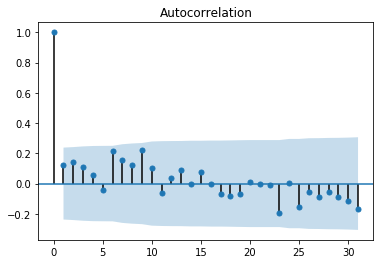

OppLoans


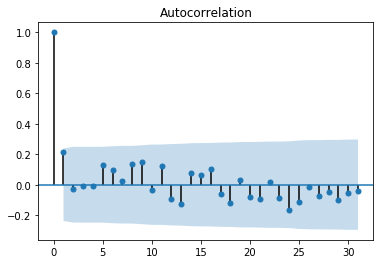

Century Support Service
NA
BofI Federal Bank


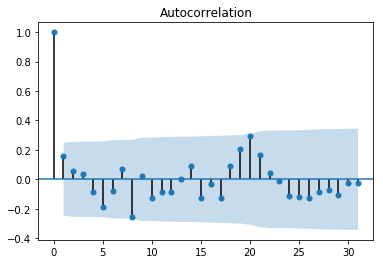

PL-PersonalLoans.com


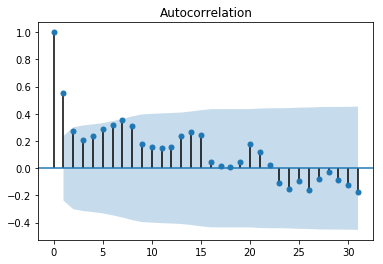

Freedom Plus


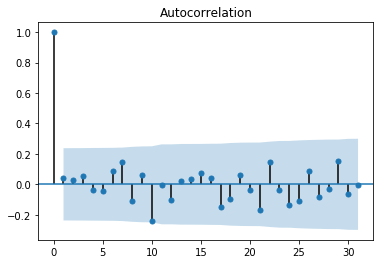

Marlette Funding (BestEgg)


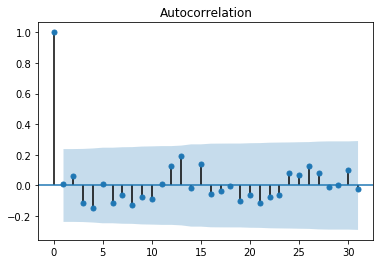

Upstart


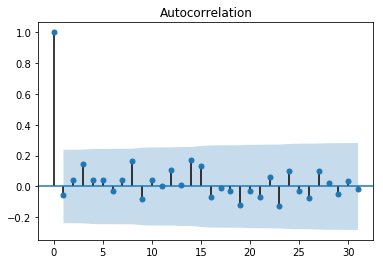

Headway Capital
NA
PL-PersonalLoans.com_unmatched


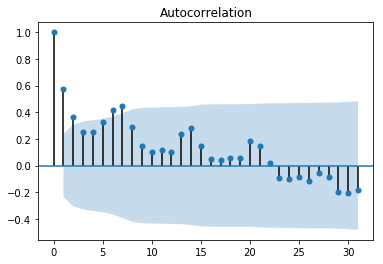

Goldman Sachs - Marcus


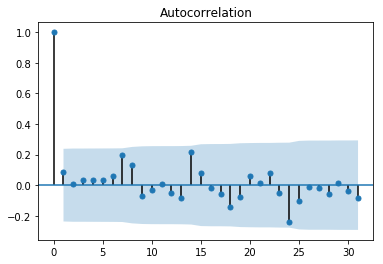

SpringLeaf


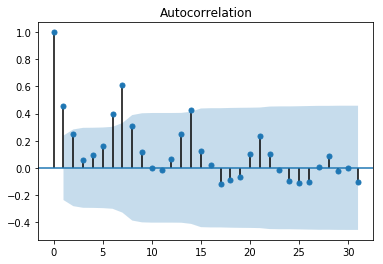

LoanMe


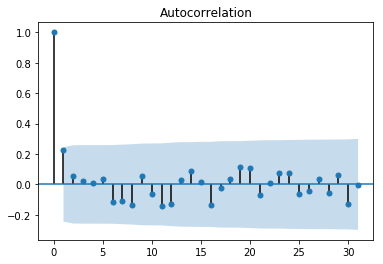

Elevate Credit Service


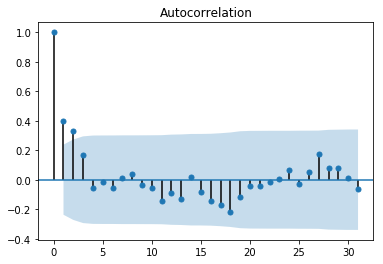

Rapid Advance


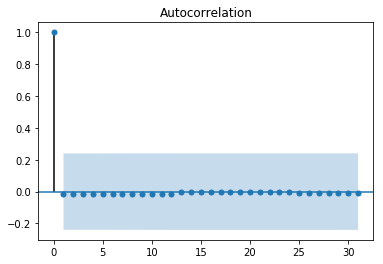

First Midwest Bank


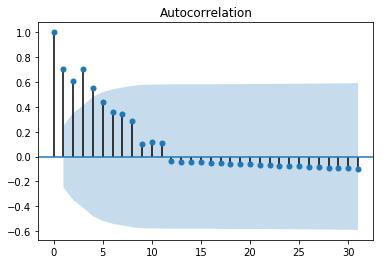

ClearOne Advantage_PL
NA
Finova
NA


In [12]:
for vend in vendor_names:
    print(vend)
    if daily_vend_revs[vend].values.sum() > 0:
        plot_acf(daily_vend_revs[vend], lags=31)
        pyplot.show()
    else:
        print("NA")

Prosper Marketplace, Inc
Test MSE: 206506.286
Test mean percent difference: nan
Test mean difference: 41.71


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


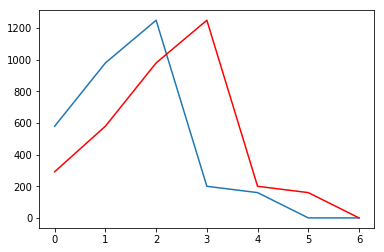

Freedom Debt Relief (Personal Loans)
Test MSE: 505071.857
Test mean percent difference: 0.988
Test mean difference: 92.43


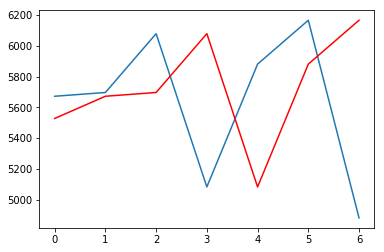

Accredited Debt Relief
Test MSE: 29799985.485
Test mean percent difference: 6.015
Test mean difference: 967.18


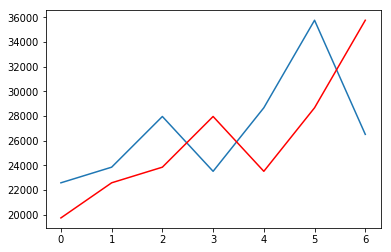

Lending Club
Test MSE: 2956016.898
Test mean percent difference: 28.737
Test mean difference: 29.33


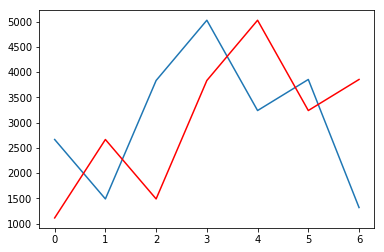

Discover - Personal Loans
Test MSE: 0.000
Test mean percent difference: nan
Test mean difference: 0.00


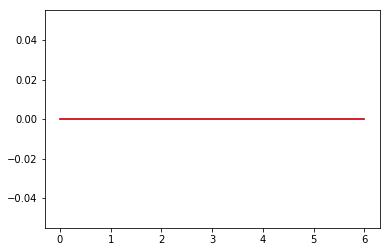

Clearlane
Test MSE: 8064.000
Test mean percent difference: 0.431
Test mean difference: 8.00


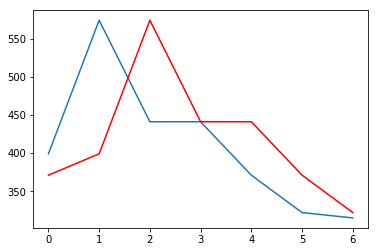

Eloan
Test MSE: 148571.429
Test mean percent difference: 48.810
Test mean difference: 114.29


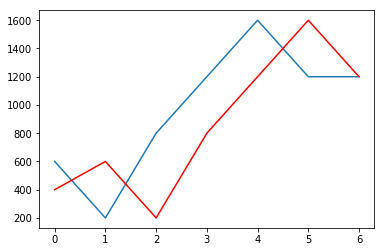

LoanMart
NA
SOFI
Test MSE: 0.000
Test mean percent difference: nan
Test mean difference: 0.00


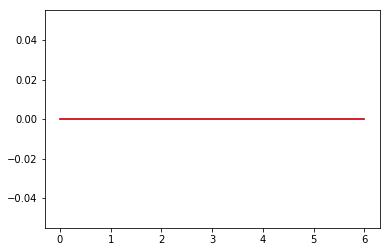

LendingPoint LLC
Test MSE: 2765706.085
Test mean percent difference: nan
Test mean difference: 212.04


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


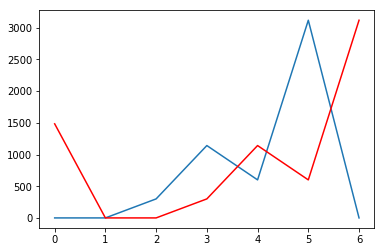

Finance Factory
NA
National Debt Relief
Test MSE: 90971.429
Test mean percent difference: 53.151
Test mean difference: 97.14


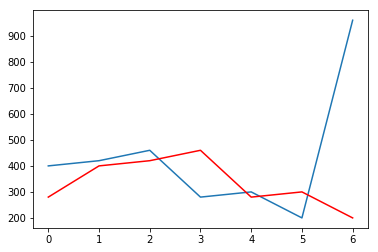

CashNetUSA
NA
LendingUSA
Test MSE: 9642.857
Test mean percent difference: nan
Test mean difference: 21.43


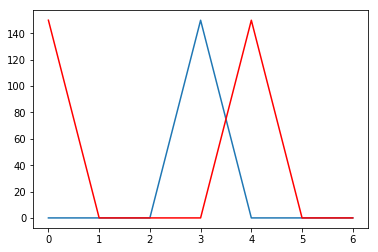

Net Credit
Test MSE: 1214128.169
Test mean percent difference: 14.236
Test mean difference: 86.20


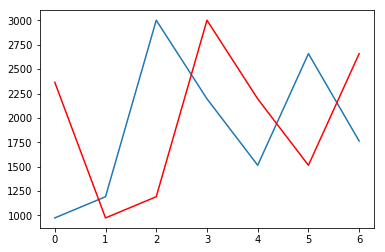

EPCVIP
Test MSE: 3206484.514
Test mean percent difference: 7.411
Test mean difference: 76.00


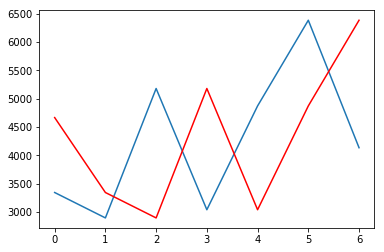

CashUSA
Test MSE: 7849971.138
Test mean percent difference: 240.645
Test mean difference: 450.87


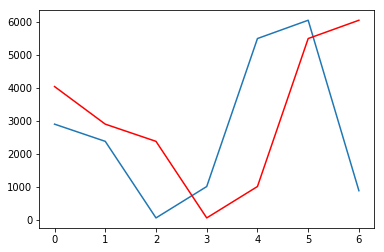

Lightstream
Test MSE: 80000.000
Test mean percent difference: nan
Test mean difference: 0.00


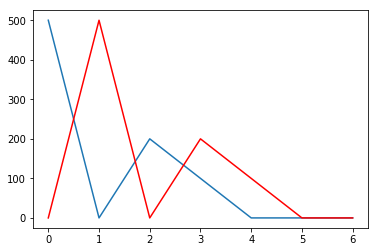

Upgrade
Test MSE: 1110682.541
Test mean percent difference: 13.623
Test mean difference: 515.16


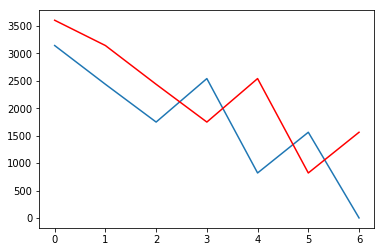

Avant Credit
Test MSE: 682161.750
Test mean percent difference: 12.675
Test mean difference: 33.43


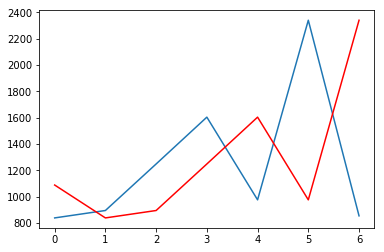

Payoff
Test MSE: 1849564.286
Test mean percent difference: nan
Test mean difference: 0.00


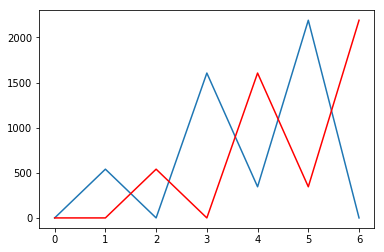

OppLoans
Test MSE: 382857.143
Test mean percent difference: nan
Test mean difference: 142.86


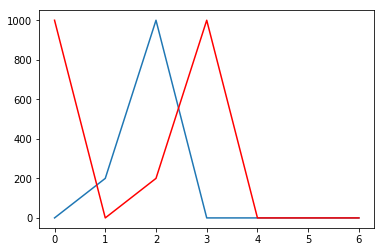

Century Support Service
NA
BofI Federal Bank
Test MSE: 589001.786
Test mean percent difference: inf
Test mean difference: 0.00


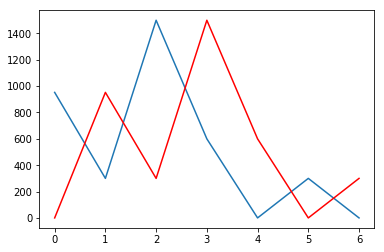

PL-PersonalLoans.com
Test MSE: 247894.034
Test mean percent difference: nan
Test mean difference: 14.99


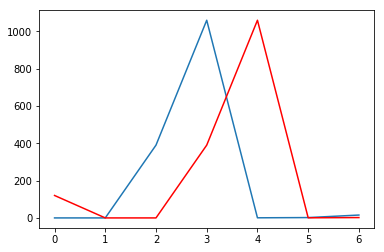

Freedom Plus
Test MSE: 11196549.843
Test mean percent difference: inf
Test mean difference: 152.38


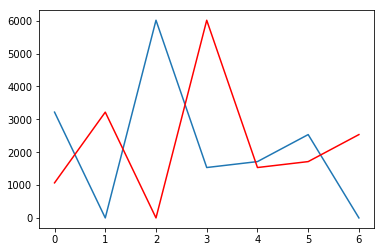

Marlette Funding (BestEgg)
Test MSE: 396557.143
Test mean percent difference: inf
Test mean difference: 101.43


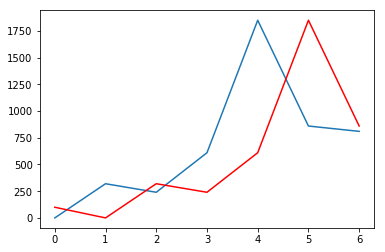

Upstart
Test MSE: 570514.286
Test mean percent difference: inf
Test mean difference: 45.71


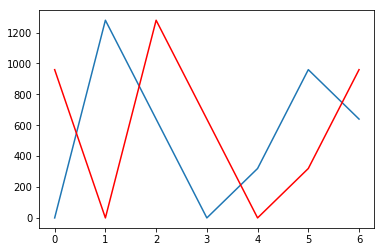

Headway Capital
NA
PL-PersonalLoans.com_unmatched
Test MSE: 15373.681
Test mean percent difference: 39.893
Test mean difference: 15.68


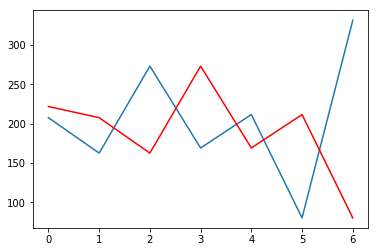

Goldman Sachs - Marcus
Test MSE: 2650861.955
Test mean percent difference: inf
Test mean difference: 77.61


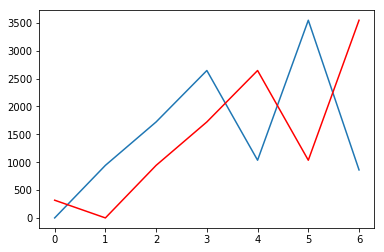

SpringLeaf
Test MSE: 2828571.429
Test mean percent difference: 18.776
Test mean difference: 200.00


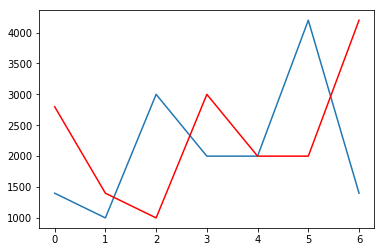

LoanMe
Test MSE: 333839.286
Test mean percent difference: 33.482
Test mean difference: 67.86


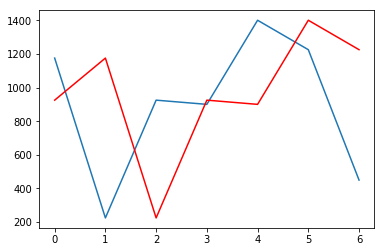

Elevate Credit Service
Test MSE: 19314.286
Test mean percent difference: nan
Test mean difference: 74.29


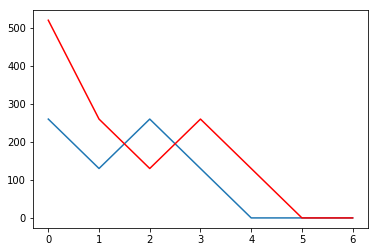

Rapid Advance
Test MSE: 0.000
Test mean percent difference: nan
Test mean difference: 0.00


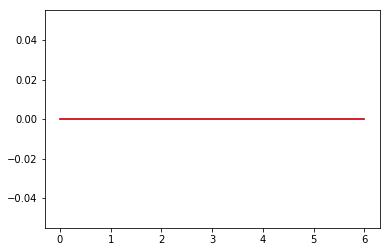

First Midwest Bank
Test MSE: 0.000
Test mean percent difference: nan
Test mean difference: 0.00


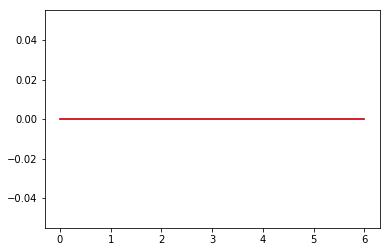

ClearOne Advantage_PL
NA
Finova
NA


In [13]:
## Persistence model -- only used for testing

predicts = {}
for vend in vendor_names:
    predicts[vend] = {}
    if daily_vend_revs[vend].values.sum() > 0:
        # create lagged dataset
        values = DataFrame(daily_vend_revs[vend].values)
        df = concat([values.shift(1), values], axis = 1)
        df.columns = ['t-1','t=1']

        # split into train and test sets
        X = df.values
        train, test = X[1:len(X) - 11], X[len(X) - 11:len(X) - 4]
        train_X, train_y = train[:,0], train[:,1]
        test_X, test_y = test[:,0], test[:,1]

        # persistence model
        def model_persistence(x):
            return x

        # walk-forward validation
        predictions = list()
        for x in test_X:
            yhat = model_persistence(x)
            predictions.append(yhat)

        # print MSE result
        test_score = mean_squared_error(test_y, predictions)
        print(vend)
        print('Test MSE: %.3f' % test_score)

        # accuracy
        acc = 100*np.abs(np.mean((predictions-test_y)/predictions))
        print('Test mean percent difference: %.3f' % acc)

        diff = np.abs(np.mean(predictions-test_y))
        print("Test mean difference: %.2f" % diff)

        # plot predictions vs expected
        pyplot.plot(test_y)
        pyplot.plot(predictions, color = 'red')
        pyplot.show()
        
        predicts[vend]['test'] = test_y
        predicts[vend]['predictions'] = predictions
    else:
        print(vend)
        print("NA")
        
        predicts[vend]['test'] = 'NA'
        predicts[vend]['predictions'] = 'NA'
    
    

In [14]:
predicts

{'Accredited Debt Relief': {'predictions': [19749.539999999746,
   22594.6599999996,
   23861.00999999957,
   27968.50999999912,
   23526.599999999442,
   28674.699999999062,
   35766.55999999885],
  'test': array([22594.66, 23861.01, 27968.51, 23526.6 , 28674.7 , 35766.56,
         26519.83])},
 'Avant Credit': {'predictions': [1089.0,
   839.25,
   895.5,
   1248.75,
   1604.25,
   976.5,
   2340.0],
  'test': array([ 839.25,  895.5 , 1248.75, 1604.25,  976.5 , 2340.  ,  855.  ])},
 'BofI Federal Bank': {'predictions': [0.0,
   952.5,
   300.0,
   1500.0,
   600.0,
   0.0,
   300.0],
  'test': array([ 952.5,  300. , 1500. ,  600. ,    0. ,  300. ,    0. ])},
 'CashNetUSA': {'predictions': 'NA', 'test': 'NA'},
 'CashUSA': {'predictions': [4045.5999999999813,
   2906.42999999998,
   2385.0399999999872,
   65.07,
   1016.3499999999998,
   5500.2600000000075,
   6054.770000000018],
  'test': array([2906.43, 2385.04,   65.07, 1016.35, 5500.26, 6054.77,  889.49])},
 'Century Support Servic

In [15]:
predicts['Prosper Marketplace, Inc']

{'predictions': [292.0, 580.0, 980.0, 1250.0, 200.0, 160.0, 0.0],
 'test': array([ 580.,  980., 1250.,  200.,  160.,    0.,    0.])}

Prosper Marketplace, Inc
Lag: 10
Coefficients: [ 1.15507306e+03  1.73752518e-01 -6.27511809e-02 -2.46591240e-01
  9.11284453e-02 -3.88601597e-02  1.39932019e-01 -1.76964611e-03
  1.00674507e-02  2.85725657e-02  1.44111788e-02]
traffic day= 2018-05-03, predicted=1034.575219, expected=358.000000
traffic day= 2018-05-04, predicted=1639.462485, expected=760.000000
traffic day= 2018-05-05, predicted=1283.550736, expected=988.000000
traffic day= 2018-05-06, predicted=1364.178764, expected=680.000000
traffic day= 2018-05-07, predicted=1071.796030, expected=200.000000
traffic day= 2018-05-08, predicted=1191.560443, expected=0.000000
traffic day= 2018-05-09, predicted=1213.606806, expected=670.000000
Test MSE: 608858.868
Test mean percent difference: inf
Test mean difference: 734.68


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide


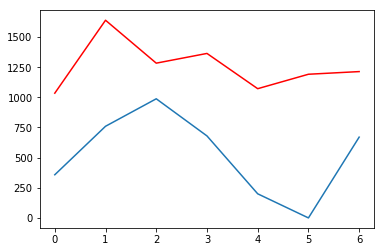

Freedom Debt Relief (Personal Loans)
Lag: 9
Coefficients: [ 1.55127519e+04 -9.73518796e-02 -3.97216883e-01 -3.21208690e-01
 -4.38088865e-01 -6.52342231e-02 -5.05964699e-02 -1.81923177e-01
 -3.42827657e-01  1.18101172e-01]
traffic day= 2018-04-25, predicted=5633.581800, expected=5517.500000
traffic day= 2018-04-26, predicted=5217.563897, expected=5362.500000
traffic day= 2018-04-27, predicted=5349.436884, expected=5481.500000
traffic day= 2018-04-30, predicted=5352.689687, expected=5672.500000
traffic day= 2018-05-01, predicted=5660.776046, expected=5890.000000
traffic day= 2018-05-02, predicted=6146.079637, expected=4647.500000
traffic day= 2018-05-03, predicted=5521.167397, expected=5785.000000
Test MSE: 360298.993
Test mean percent difference: 7.025
Test mean difference: 369.04


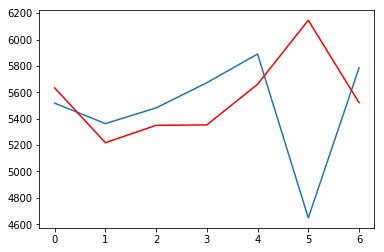

Accredited Debt Relief
Lag: 10
Coefficients: [ 8.95529437e+03  9.35805324e-01 -3.97994523e-01 -1.90817597e-01
  4.15090558e-01 -1.44742111e-01 -7.15939309e-02  5.79538649e-01
 -4.66874827e-01  1.05220141e-01 -1.19096983e-01]
traffic day= 2018-05-03, predicted=25166.795480, expected=30195.710000
traffic day= 2018-05-04, predicted=23772.574795, expected=18006.920000
traffic day= 2018-05-05, predicted=26048.465205, expected=24236.080000
traffic day= 2018-05-06, predicted=29442.811900, expected=28537.800000
traffic day= 2018-05-07, predicted=29136.351555, expected=25487.730000
traffic day= 2018-05-08, predicted=25837.308662, expected=27456.950000
traffic day= 2018-05-09, predicted=23108.613298, expected=23554.980000
Test MSE: 11253066.241
Test mean percent difference: 15.054
Test mean difference: 3471.20


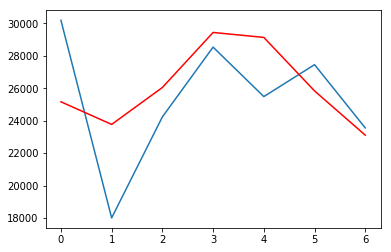

Lending Club
Lag: 10
Coefficients: [ 2.14611049e+03  3.52668954e-01  1.37078765e-02 -1.87303934e-01
 -3.31433294e-02  7.76779256e-02  6.89609452e-02  3.86826296e-01
 -2.69235653e-01  2.74615652e-01 -1.14901806e-01]
traffic day= 2018-05-03, predicted=3176.540927, expected=9767.250000
traffic day= 2018-05-04, predicted=3908.424312, expected=4476.380000
traffic day= 2018-05-05, predicted=4479.978535, expected=4173.750000
traffic day= 2018-05-06, predicted=3265.830163, expected=3605.630000
traffic day= 2018-05-07, predicted=6255.446710, expected=2613.940000
traffic day= 2018-05-08, predicted=3371.419286, expected=3456.560000
traffic day= 2018-05-09, predicted=6014.565877, expected=2224.690000
Test MSE: 10228605.544
Test mean percent difference: 46.494
Test mean difference: 1924.60


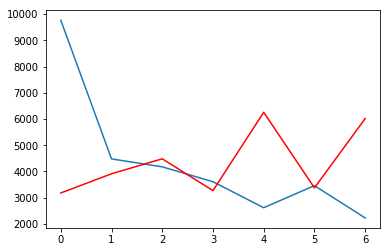

Discover - Personal Loans
Lag: 10
Coefficients: [21.5772662  -0.05496989  0.34987967  0.09510486 -0.09809784 -0.11622872
  0.03868863  0.3498891   0.05314998 -0.0806493  -0.07251445]
traffic day= 2018-05-03, predicted=21.577266, expected=0.000000
traffic day= 2018-05-04, predicted=20.391166, expected=0.000000
traffic day= 2018-05-05, predicted=28.005813, expected=0.000000
traffic day= 2018-05-06, predicted=29.224347, expected=0.000000
traffic day= 2018-05-07, predicted=29.592088, expected=0.000000
traffic day= 2018-05-08, predicted=28.330859, expected=0.000000
traffic day= 2018-05-09, predicted=28.870416, expected=0.000000
Test MSE: 718.799
Test mean percent difference: inf
Test mean difference: 26.57


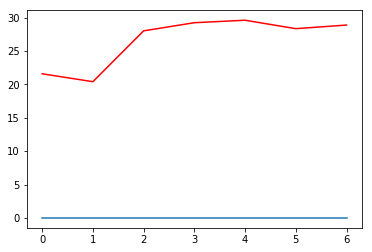

Clearlane
Lag: 7
Coefficients: [ 5.35799383e-04  1.31254336e-01  2.23379086e-01  6.89891399e-01
 -4.44034537e-01  5.26065359e-01  8.57192208e-02  1.46073999e-03]
traffic day= 2018-03-31, predicted=319.694488, expected=252.000000
traffic day= 2018-04-01, predicted=508.864799, expected=210.000000
traffic day= 2018-04-02, predicted=471.910942, expected=357.000000
traffic day= 2018-04-03, predicted=405.375385, expected=329.000000
traffic day= 2018-04-04, predicted=633.806692, expected=322.000000
traffic day= 2018-04-05, predicted=480.450215, expected=371.000000
traffic day= 2018-04-06, predicted=570.515621, expected=434.000000
Test MSE: 34397.102
Test mean percent difference: 59.389
Test mean difference: 169.30


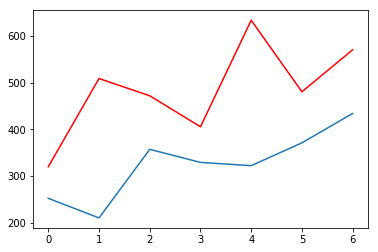

Eloan
Lag: 10
Coefficients: [ 7.76621426e+02  7.08767274e-02 -2.10939266e-02  8.92016111e-02
  8.92727809e-02 -3.86938950e-02 -2.01597994e-01 -1.72806632e-01
 -6.59472999e-02 -1.62508800e-01 -4.44087936e-02]
traffic day= 2018-05-03, predicted=584.527361, expected=1400.000000
traffic day= 2018-05-04, predicted=566.036055, expected=400.000000
traffic day= 2018-05-05, predicted=541.281368, expected=200.000000
traffic day= 2018-05-06, predicted=540.395340, expected=600.000000
traffic day= 2018-05-07, predicted=632.101066, expected=400.000000
traffic day= 2018-05-08, predicted=656.502661, expected=1000.000000
traffic day= 2018-05-09, predicted=594.701495, expected=0.000000
Test MSE: 191160.069
Test mean percent difference: inf
Test mean difference: 373.32


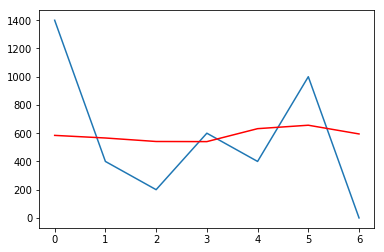

LoanMart
NA
SOFI
Lag: 10
Coefficients: [ 1.77491668e+02  1.24547170e-01  3.09014646e-01 -1.29335810e-01
  5.15830377e-03 -8.05495127e-02 -1.42661712e-01  1.21034706e-01
  8.54483661e-02  1.10641885e-02 -5.37036458e-01]
traffic day= 2018-05-03, predicted=-82.678230, expected=250.000000
traffic day= 2018-05-04, predicted=182.847721, expected=250.000000
traffic day= 2018-05-05, predicted=-108.105515, expected=0.000000
traffic day= 2018-05-06, predicted=264.248035, expected=0.000000
traffic day= 2018-05-07, predicted=40.024565, expected=250.000000
traffic day= 2018-05-08, predicted=288.483964, expected=250.000000
traffic day= 2018-05-09, predicted=53.862940, expected=250.000000
Test MSE: 40105.501
Test mean percent difference: inf
Test mean difference: 165.80


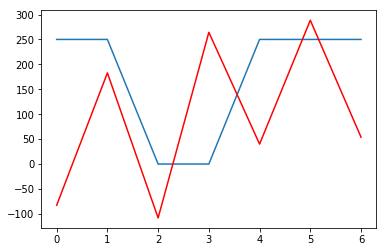

LendingPoint LLC
Lag: 10
Coefficients: [ 3.13001830e+03  1.63823057e-01  4.03719401e-02 -3.23108170e-01
  6.24638785e-02 -1.36484868e-01 -2.42818532e-01  2.19254065e-01
 -2.28325204e-01 -2.11718784e-01  1.47466116e-01]
traffic day= 2018-05-03, predicted=2243.007716, expected=744.300000
traffic day= 2018-05-04, predicted=3036.111423, expected=1371.000000
traffic day= 2018-05-05, predicted=2560.049326, expected=0.000000
traffic day= 2018-05-06, predicted=2312.522586, expected=1230.000000
traffic day= 2018-05-07, predicted=2470.203733, expected=1630.740000
traffic day= 2018-05-08, predicted=1891.188103, expected=0.000000
traffic day= 2018-05-09, predicted=1915.677676, expected=399.750000
Test MSE: 2760536.727
Test mean percent difference: inf
Test mean difference: 1579.00


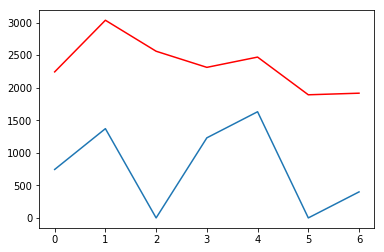

Finance Factory
NA
National Debt Relief
Lag: 9
Coefficients: [ 1.48050702e+03  2.02738834e-01  2.31628430e-01 -5.77061405e-01
 -1.00762710e-01  3.55818432e-01 -2.17615701e-01 -3.81106772e-01
  3.93402650e-01 -4.69335552e-01]
traffic day= 2018-04-25, predicted=956.267258, expected=900.000000
traffic day= 2018-04-26, predicted=930.098886, expected=700.000000
traffic day= 2018-04-27, predicted=1300.471966, expected=480.000000
traffic day= 2018-04-30, predicted=703.419286, expected=560.000000
traffic day= 2018-05-01, predicted=1163.376302, expected=320.000000
traffic day= 2018-05-02, predicted=799.706048, expected=400.000000
traffic day= 2018-05-03, predicted=1105.453901, expected=680.000000
Test MSE: 257416.339
Test mean percent difference: 93.130
Test mean difference: 429.09


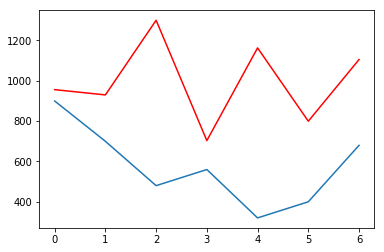

CashNetUSA
NA
LendingUSA
Lag: 10
Coefficients: [ 1.45611646e+02 -1.92655716e-01  2.76040379e-01  1.08942734e-01
  4.63424902e-02 -1.82288077e-01 -2.09510671e-01  4.25725591e-02
  2.90879679e-01 -4.59826918e-02 -1.46056787e-01]
traffic day= 2018-05-03, predicted=200.092944, expected=0.000000
traffic day= 2018-05-04, predicted=160.921034, expected=0.000000
traffic day= 2018-05-05, predicted=86.391491, expected=150.000000
traffic day= 2018-05-06, predicted=178.995876, expected=150.000000
traffic day= 2018-05-07, predicted=206.561422, expected=150.000000
traffic day= 2018-05-08, predicted=58.461617, expected=300.000000
traffic day= 2018-05-09, predicted=134.294444, expected=0.000000
Test MSE: 21484.936
Test mean percent difference: inf
Test mean difference: 104.16


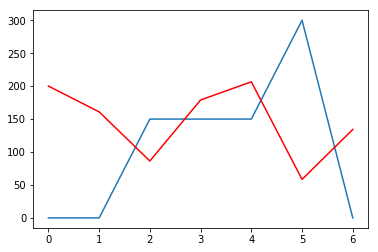

Net Credit
Lag: 10
Coefficients: [ 1.12754856e+03 -4.27532453e-02 -2.39170429e-04 -5.44045742e-03
  9.29585201e-02 -1.28840201e-01  1.86292864e-02  5.99855646e-01
  1.30404944e-01 -1.05997254e-01 -8.18064392e-02]
traffic day= 2018-05-03, predicted=1540.012272, expected=3714.000000
traffic day= 2018-05-04, predicted=2229.184822, expected=3153.500000
traffic day= 2018-05-05, predicted=2084.185859, expected=1707.100000
traffic day= 2018-05-06, predicted=1044.420322, expected=1248.700000
traffic day= 2018-05-07, predicted=1507.818469, expected=3195.200000
traffic day= 2018-05-08, predicted=3038.154014, expected=2140.500000
traffic day= 2018-05-09, predicted=2377.862503, expected=4558.200000
Test MSE: 2024487.983
Test mean percent difference: 42.698
Test mean difference: 1226.29


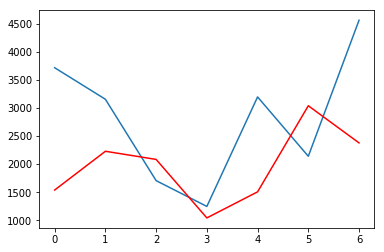

EPCVIP
Lag: 9
Coefficients: [ 4.68726156e+02  8.87502932e-01 -2.97554080e-01  1.87376057e-01
 -2.74833799e-01  2.75732700e-01 -2.79160144e-02 -1.04680174e-01
 -2.13467401e-01  4.94110317e-01]
traffic day= 2018-05-03, predicted=3518.313580, expected=4263.600000
traffic day= 2018-05-04, predicted=3858.075800, expected=2694.200000
traffic day= 2018-05-05, predicted=4347.919061, expected=2147.000000
traffic day= 2018-05-06, predicted=4310.464701, expected=2542.200000
traffic day= 2018-05-07, predicted=3734.439764, expected=3355.400000
traffic day= 2018-05-08, predicted=3417.977828, expected=3389.600000
traffic day= 2018-05-09, predicted=3855.288229, expected=3822.800000
Test MSE: 1432342.203
Test mean percent difference: 31.669
Test mean difference: 841.98


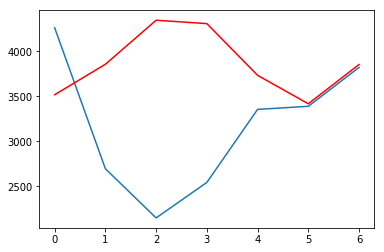

CashUSA
Lag: 10
Coefficients: [ 1.03359582e+04  5.07880210e-01 -3.53199222e-01  3.87814282e-02
 -3.17288541e-01 -3.06652403e-01 -1.80924461e-01  4.31015243e-01
 -4.78596818e-01 -1.57030749e-01 -1.88442806e-01]
traffic day= 2018-05-03, predicted=6316.675459, expected=10318.170000
traffic day= 2018-05-04, predicted=4634.046250, expected=6811.070000
traffic day= 2018-05-05, predicted=2031.520497, expected=3632.100000
traffic day= 2018-05-06, predicted=1671.862423, expected=3839.830000
traffic day= 2018-05-07, predicted=5591.633687, expected=6933.790000
traffic day= 2018-05-08, predicted=6834.730795, expected=5718.470000
traffic day= 2018-05-09, predicted=6091.976060, expected=6584.990000
Test MSE: 4471973.372
Test mean percent difference: 40.631
Test mean difference: 2500.85


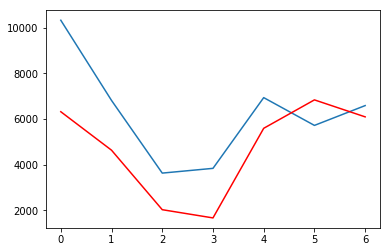

Lightstream
Lag: 10
Coefficients: [ 9.56616884e+02  8.62125656e-02  2.54219919e-01 -1.58160022e-01
 -4.79679153e-02  2.64277259e-01  1.02315595e-01 -2.17183914e-01
  1.17963157e-01 -2.65230734e-03 -2.23894984e-01]
traffic day= 2018-05-03, predicted=1372.973711, expected=940.000000
traffic day= 2018-05-04, predicted=578.328602, expected=500.000000
traffic day= 2018-05-05, predicted=860.026951, expected=1520.000000
traffic day= 2018-05-06, predicted=1165.156417, expected=400.000000
traffic day= 2018-05-07, predicted=1010.032704, expected=50.000000
traffic day= 2018-05-08, predicted=1336.600032, expected=816.410000
traffic day= 2018-05-09, predicted=1422.204663, expected=440.000000
Test MSE: 481659.548
Test mean percent difference: 380.648
Test mean difference: 585.74


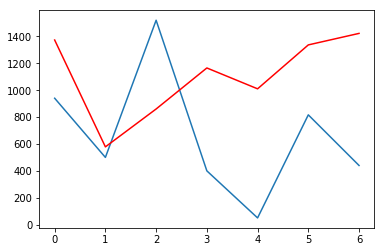

Upgrade
Lag: 10
Coefficients: [ 7.57118103e+02  1.83515914e-01  9.85638798e-02  4.50515759e-02
  1.09418157e-01  2.83753935e-02  6.39063232e-02  1.36653444e-01
  4.30575451e-02 -1.22794693e-01 -1.89719034e-01]
traffic day= 2018-05-03, predicted=1493.132642, expected=4110.900000
traffic day= 2018-05-04, predicted=1327.892643, expected=3998.000000
traffic day= 2018-05-05, predicted=1475.245343, expected=2080.800000
traffic day= 2018-05-06, predicted=1484.029293, expected=2338.700000
traffic day= 2018-05-07, predicted=1520.394731, expected=1432.000000
traffic day= 2018-05-08, predicted=1448.562504, expected=2070.000000
traffic day= 2018-05-09, predicted=1294.811102, expected=2281.000000
Test MSE: 2349414.919
Test mean percent difference: 38.813
Test mean difference: 1191.72


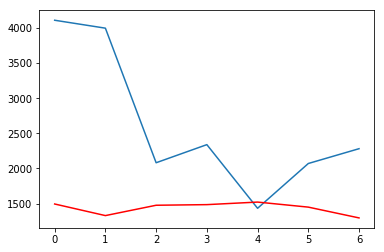

Avant Credit
Lag: 10
Coefficients: [ 3.42138977e+03 -2.90242025e-01 -2.95595654e-01 -4.05602156e-01
 -6.60231305e-01 -3.23665407e-01 -1.26008343e-01 -6.19561797e-02
 -1.69927975e-01  3.83701196e-02 -4.47128866e-02]
traffic day= 2018-05-03, predicted=1598.431314, expected=2382.750000
traffic day= 2018-05-04, predicted=992.194134, expected=1161.000000
traffic day= 2018-05-05, predicted=1107.096033, expected=888.750000
traffic day= 2018-05-06, predicted=890.671553, expected=1104.750000
traffic day= 2018-05-07, predicted=754.400166, expected=1201.500000
traffic day= 2018-05-08, predicted=901.637645, expected=1966.500000
traffic day= 2018-05-09, predicted=1177.825822, expected=940.500000
Test MSE: 303901.348
Test mean percent difference: 29.439
Test mean difference: 475.57


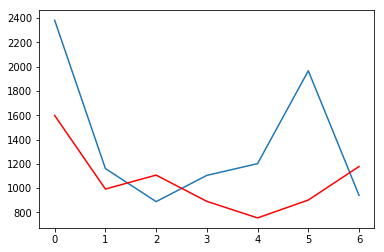

Payoff
Lag: 10
Coefficients: [ 1.67750018e+03  4.90047514e-02 -1.03247893e-01 -4.26885191e-02
  6.11678834e-02 -3.22034769e-01  4.27132704e-01 -9.06978431e-02
 -1.24640164e-01  3.23759407e-01 -5.07391909e-02]
traffic day= 2018-05-03, predicted=1330.738970, expected=810.000000
traffic day= 2018-05-04, predicted=3535.680226, expected=1050.000000
traffic day= 2018-05-05, predicted=895.113369, expected=1140.000000
traffic day= 2018-05-06, predicted=1090.804243, expected=2475.000000
traffic day= 2018-05-07, predicted=3947.028899, expected=1110.000000
traffic day= 2018-05-08, predicted=761.320419, expected=3885.000000
traffic day= 2018-05-09, predicted=886.393851, expected=1350.000000
Test MSE: 3778111.482
Test mean percent difference: 78.406
Test mean difference: 1166.92


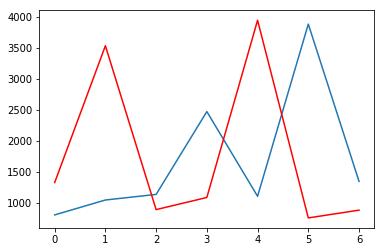

OppLoans
Lag: 10
Coefficients: [ 4.26572296e+02  1.06705143e-01 -3.53880838e-02 -2.59865452e-01
 -1.77288165e-01  1.38154467e-01  1.10978319e-02 -1.19014622e-01
  1.52200760e-01  4.19008686e-01  9.96655084e-02]
traffic day= 2018-05-03, predicted=1049.008181, expected=800.000000
traffic day= 2018-05-04, predicted=1100.578835, expected=0.000000
traffic day= 2018-05-05, predicted=545.650286, expected=200.000000
traffic day= 2018-05-06, predicted=16.323887, expected=400.000000
traffic day= 2018-05-07, predicted=136.745350, expected=600.000000
traffic day= 2018-05-08, predicted=586.704567, expected=600.000000
traffic day= 2018-05-09, predicted=983.986241, expected=200.000000
Test MSE: 338482.341
Test mean percent difference: inf
Test mean difference: 446.98


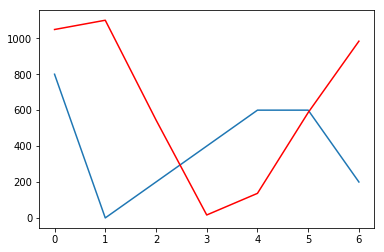

Century Support Service
NA
BofI Federal Bank
Lag: 10
Coefficients: [ 8.66872256e+02  1.09047015e-01 -1.34184266e-01  7.90459216e-02
 -1.52643089e-01 -2.01721286e-01 -9.55678380e-02  8.03506123e-02
 -3.23161148e-01 -1.13980995e-02 -2.41066900e-01]
traffic day= 2018-05-03, predicted=527.478936, expected=870.000000
traffic day= 2018-05-04, predicted=-139.362751, expected=0.000000
traffic day= 2018-05-05, predicted=720.280200, expected=1200.000000
traffic day= 2018-05-06, predicted=669.521424, expected=450.000000
traffic day= 2018-05-07, predicted=606.276712, expected=1537.500000
traffic day= 2018-05-08, predicted=809.820780, expected=1200.000000
traffic day= 2018-05-09, predicted=686.027450, expected=0.000000
Test MSE: 272159.099
Test mean percent difference: inf
Test mean difference: 578.75


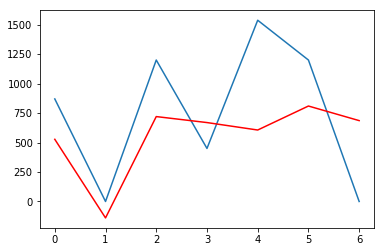

PL-PersonalLoans.com
Lag: 10
Coefficients: [ 2.04718317e+02  5.71958966e-01 -1.77797517e-02  3.13624072e-01
 -2.54084677e-01  3.84566897e-01 -3.87876865e-01  4.51621891e-01
 -2.36689175e-01 -9.59949231e-02 -2.15298601e-01]
traffic day= 2018-05-03, predicted=139.341960, expected=109.480000
traffic day= 2018-05-04, predicted=85.611470, expected=246.500000
traffic day= 2018-05-05, predicted=191.784142, expected=0.000000
traffic day= 2018-05-06, predicted=132.475415, expected=0.000000
traffic day= 2018-05-07, predicted=331.438421, expected=211.660000
traffic day= 2018-05-08, predicted=315.233283, expected=144.740000
traffic day= 2018-05-09, predicted=315.755313, expected=124.850000
Test MSE: 22995.345
Test mean percent difference: inf
Test mean difference: 132.02


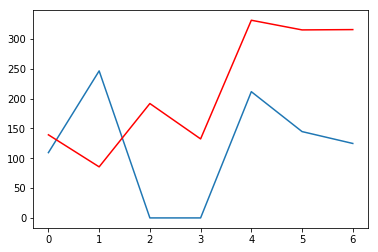

Freedom Plus
Lag: 10
Coefficients: [ 2.73262324e+03  1.65611014e-01 -2.59343244e-01  2.91057581e-01
 -2.08839570e-03 -1.64183924e-01  1.52048874e-01  1.17159916e-01
 -3.21963794e-01  2.31653097e-01 -2.82954495e-01]
traffic day= 2018-05-03, predicted=-106.752405, expected=5770.600000
traffic day= 2018-05-04, predicted=4231.523881, expected=2091.000000
traffic day= 2018-05-05, predicted=2828.106971, expected=469.950000
traffic day= 2018-05-06, predicted=-351.762822, expected=351.540000
traffic day= 2018-05-07, predicted=3974.392895, expected=2635.480000
traffic day= 2018-05-08, predicted=3979.133576, expected=1901.000000
traffic day= 2018-05-09, predicted=-214.162864, expected=3962.200000
Test MSE: 9819140.944
Test mean percent difference: 209.692
Test mean difference: 2265.83


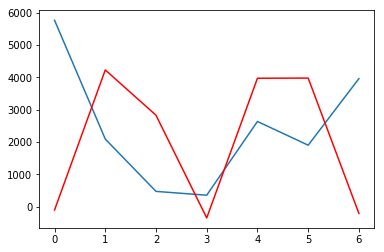

Marlette Funding (BestEgg)
Lag: 10
Coefficients: [ 1.16394979e+03 -2.53580818e-01 -1.15482149e-01 -1.67151057e-01
 -2.26244207e-01  2.58268123e-02 -8.00302858e-02 -1.29114163e-01
 -2.33770567e-01 -1.59850821e-01 -1.59518326e-01]
traffic day= 2018-05-03, predicted=686.041746, expected=1240.000000
traffic day= 2018-05-04, predicted=571.503449, expected=760.000000
traffic day= 2018-05-05, predicted=412.466440, expected=350.000000
traffic day= 2018-05-06, predicted=591.745806, expected=220.000000
traffic day= 2018-05-07, predicted=406.440885, expected=600.000000
traffic day= 2018-05-08, predicted=548.755944, expected=480.000000
traffic day= 2018-05-09, predicted=449.739131, expected=520.000000
Test MSE: 75946.685
Test mean percent difference: 47.065
Test mean difference: 244.37


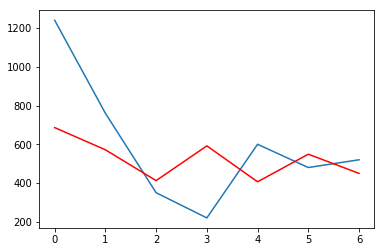

Upstart
Lag: 10
Coefficients: [-27.71686446  -0.25603242   0.10931698   0.3369352    0.10419502
   0.07166671  -0.09703824   0.33547839   0.54788374   0.12532223
   0.04556281]
traffic day= 2018-05-03, predicted=460.213070, expected=640.000000
traffic day= 2018-05-04, predicted=680.756666, expected=320.000000
traffic day= 2018-05-05, predicted=586.068792, expected=640.000000
traffic day= 2018-05-06, predicted=498.360202, expected=0.000000
traffic day= 2018-05-07, predicted=1101.012470, expected=320.000000
traffic day= 2018-05-08, predicted=706.722194, expected=320.000000
traffic day= 2018-05-09, predicted=806.240250, expected=640.000000
Test MSE: 171558.648
Test mean percent difference: inf
Test mean difference: 325.87


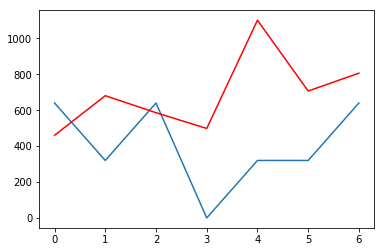

Headway Capital
NA
PL-PersonalLoans.com_unmatched
Lag: 10
Coefficients: [ 7.98978689e+01  3.46428464e-01  4.52239657e-02  1.21688075e-01
  1.00692575e-01  8.54081378e-02  2.15466285e-01  1.89677114e-01
 -8.54426670e-02 -1.64313799e-01 -9.21212674e-02]
traffic day= 2018-05-03, predicted=224.721015, expected=264.890000
traffic day= 2018-05-04, predicted=226.653754, expected=199.940000
traffic day= 2018-05-05, predicted=251.549291, expected=180.080000
traffic day= 2018-05-06, predicted=273.648176, expected=160.940000
traffic day= 2018-05-07, predicted=267.649606, expected=257.470000
traffic day= 2018-05-08, predicted=270.290744, expected=224.290000
traffic day= 2018-05-09, predicted=285.168077, expected=193.370000
Test MSE: 4397.821
Test mean percent difference: 27.601
Test mean difference: 52.11


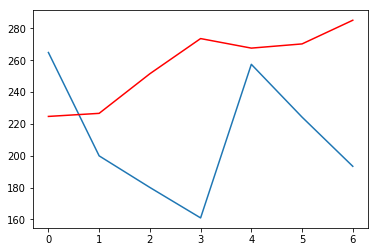

Goldman Sachs - Marcus
Lag: 10
Coefficients: [ 4.07552319e+03  2.16385145e-03 -2.59194273e-01 -2.02028349e-01
 -1.58717253e-01 -4.43623129e-02 -9.70677837e-03  1.88844381e-01
 -8.12938547e-03 -2.35189339e-01 -2.76185976e-03]
traffic day= 2018-05-03, predicted=1478.832265, expected=3649.000000
traffic day= 2018-05-04, predicted=1128.596421, expected=2695.750000
traffic day= 2018-05-05, predicted=2504.702228, expected=1711.750000
traffic day= 2018-05-06, predicted=3185.561560, expected=1168.500000
traffic day= 2018-05-07, predicted=3457.777279, expected=3515.750000
traffic day= 2018-05-08, predicted=2272.608303, expected=1291.500000
traffic day= 2018-05-09, predicted=1153.878938, expected=2849.500000
Test MSE: 2243424.862
Test mean percent difference: 50.886
Test mean difference: 1070.13


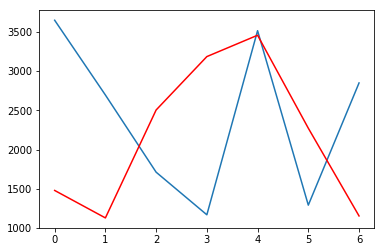

SpringLeaf
Lag: 10
Coefficients: [ 4.06562803e+02  1.76579483e-01  1.81643880e-01  1.59625656e-01
  9.59371053e-02 -2.02770616e-02  8.12594407e-02  6.44643826e-01
 -4.47933602e-02 -2.38642815e-01 -1.71953214e-01]
traffic day= 2018-05-03, predicted=2402.579210, expected=6000.000000
traffic day= 2018-05-04, predicted=1765.726766, expected=2400.000000
traffic day= 2018-05-05, predicted=2500.647299, expected=2400.000000
traffic day= 2018-05-06, predicted=1904.260659, expected=1200.000000
traffic day= 2018-05-07, predicted=2484.153592, expected=3400.000000
traffic day= 2018-05-08, predicted=3782.518288, expected=3200.000000
traffic day= 2018-05-09, predicted=3209.062109, expected=2200.000000
Test MSE: 2292308.624
Test mean percent difference: 41.776
Test mean difference: 1158.72


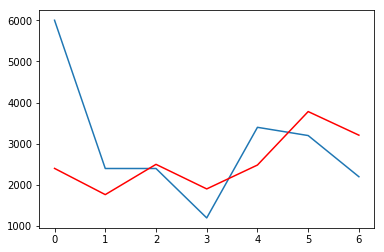

LoanMe
Lag: 10
Coefficients: [ 5.41072769e+02  3.02210009e-01  5.46122206e-03  1.88454314e-01
  1.11320296e-01  6.33023950e-02 -2.47571176e-01 -3.16108058e-01
 -3.77585031e-02  2.46100876e-01 -1.89641507e-01]
traffic day= 2018-05-03, predicted=1275.414060, expected=1150.000000
traffic day= 2018-05-04, predicted=590.666839, expected=925.000000
traffic day= 2018-05-05, predicted=852.290718, expected=475.000000
traffic day= 2018-05-06, predicted=1191.224082, expected=0.000000
traffic day= 2018-05-07, predicted=810.583589, expected=475.000000
traffic day= 2018-05-08, predicted=300.041916, expected=925.000000
traffic day= 2018-05-09, predicted=145.190285, expected=725.000000
Test MSE: 361176.958
Test mean percent difference: inf
Test mean difference: 439.54


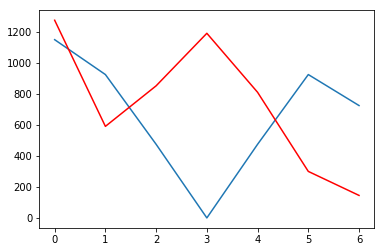

Elevate Credit Service
Lag: 10
Coefficients: [ 2.68645457e+02  3.23549870e-01  3.42761732e-01 -2.70568041e-01
 -1.28782940e-02 -9.89827072e-02 -2.73696310e-01  4.26848992e-01
  3.54173463e-02 -3.69108202e-01  1.15018978e-01]
traffic day= 2018-05-03, predicted=460.063034, expected=650.000000
traffic day= 2018-05-04, predicted=223.762735, expected=260.000000
traffic day= 2018-05-05, predicted=225.960586, expected=130.000000
traffic day= 2018-05-06, predicted=208.826601, expected=520.000000
traffic day= 2018-05-07, predicted=382.232230, expected=130.000000
traffic day= 2018-05-08, predicted=502.633147, expected=390.000000
traffic day= 2018-05-09, predicted=278.795557, expected=1170.000000
Test MSE: 144854.170
Test mean percent difference: 75.629
Test mean difference: 281.55


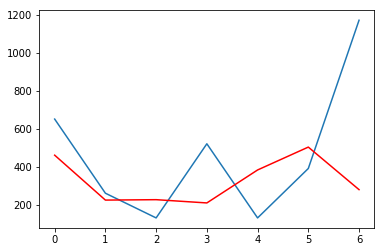

Rapid Advance
Lag: 10
Coefficients: [23.07692308 -0.03846154 -0.03846154 -0.03846154 -0.03846154 -0.03846154
 -0.03846154 -0.03846154 -0.03846154 -0.03846154 -0.03846154]
traffic day= 2018-05-03, predicted=23.076923, expected=0.000000
traffic day= 2018-05-04, predicted=22.189349, expected=0.000000
traffic day= 2018-05-05, predicted=21.335913, expected=0.000000
traffic day= 2018-05-06, predicted=20.515301, expected=0.000000
traffic day= 2018-05-07, predicted=19.726251, expected=0.000000
traffic day= 2018-05-08, predicted=18.967549, expected=0.000000
traffic day= 2018-05-09, predicted=18.238028, expected=0.000000
Test MSE: 426.076
Test mean percent difference: inf
Test mean difference: 20.58


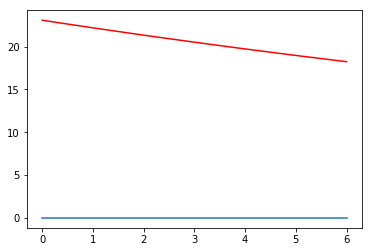

First Midwest Bank
Lag: 10
Coefficients: [ 0.53514215  0.07102874  0.17554102  0.03364964  0.0339656   0.11204745
 -0.02385483  0.25512588  0.22390135 -0.3434148  -0.07446651]
traffic day= 2018-05-01, predicted=0.535142, expected=0.000000
traffic day= 2018-05-03, predicted=0.573153, expected=0.000000
traffic day= 2018-05-04, predicted=0.669792, expected=0.000000
traffic day= 2018-05-05, predicted=0.701336, expected=0.000000
traffic day= 2018-05-06, predicted=0.739996, expected=0.000000
traffic day= 2018-05-07, predicted=0.812783, expected=0.000000
traffic day= 2018-05-08, predicted=0.820577, expected=0.000000
Test MSE: 0.491
Test mean percent difference: inf
Test mean difference: 0.69


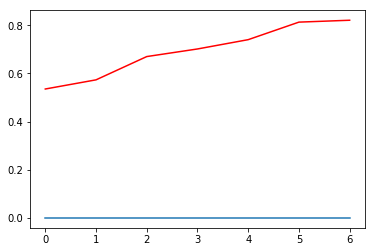

ClearOne Advantage_PL
NA
Finova
NA


In [132]:
## AR model

predicts = {}
for vend in vendor_names:
    predicts[vend] = {}
    if daily_vend_revs[vend].values.sum() > 0:
        # vendor name
        print(vend)

        # split into train and test sets
        X = daily_vend_revs[vend].values
        train_end = len(X) - 20
        test_start = train_end
        test_end = test_start + 7
        train, test = X[1:train_end], X[test_start:test_end]
        #train, test = X[1:len(X) - 7], X[len(X) - 7:]
        
        traffic_days = daily_vend_revs[vend].index.values[test_start:test_end]
        
        # train autoregression
        model = AR(train)
        model_fit = model.fit()
        
        print('Lag: %s' % model_fit.k_ar)
        print('Coefficients: %s' % model_fit.params)

        # make predictions
        predictions = model_fit.predict(start=len(train), end = len(train)+len(test)-1, dynamic=False)
        for i in range(len(predictions)):
            print('traffic day= %s, predicted=%f, expected=%f' % (traffic_days[i],predictions[i],test[i]))

        # print error
        error = mean_squared_error(test, predictions)
        print('Test MSE: %.3f' % error)

        # accuracy
        acc = 100*np.mean(np.abs((predictions-test)/test))
        print('Test mean percent difference: %.3f' % acc)

        diff = np.mean(np.abs(predictions-test))
        print("Test mean difference: %.2f" % diff)

        # plot predictions vs expected
        pyplot.plot(test)
        pyplot.plot(predictions, color = 'red')
        pyplot.show()
        
        predicts[vend]['traffic_day'] = traffic_days
        predicts[vend]['test'] = test.reshape(len(test),)
        predicts[vend]['predictions'] = predictions
    else:
        print(vend)
        print("NA")
        
        predicts[vend]['traffic_day'] = 'NA'
        predicts[vend]['test'] = 'NA'
        predicts[vend]['predictions'] = 'NA'
    
    

In [157]:
traffic_day = daily_vend_revs['Accredited Debt Relief'].index.values
total_pred_rev = np.zeros(len(traffic_day))
#total_pred_rev
total_exp_rev = np.zeros(len(traffic_day))
df_total_predicts = pd.DataFrame({'traffic_day': traffic_day,
                                  'predicted': total_pred_rev,
                                  'expected': total_exp_rev})
#df_total_predicts

for vend in vendor_names:
    if predicts[vend]['predictions'] != 'NA':
        df = pd.DataFrame(predicts[vend])
        for day in predicts[vend]['traffic_day']:
            pred = df.loc[df['traffic_day'] == day,'predictions']
            expec = df.loc[df['traffic_day'] == day, 'test']
            
            df_total_predicts.loc[df_total_predicts['traffic_day'] == day,'predicted'] += pred.values
            df_total_predicts.loc[df_total_predicts['traffic_day'] == day, 'expected'] += expec.values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


In [158]:
# build total revenue dataframe

#df_total_predicts.head
#df_total_predicts['predicted'].values
df_total_predicts['diff'] = df_total_predicts['predicted'].values-df_total_predicts['expected'].values
df_total_predicts['acc_perc'] = 100*df_total_predicts['diff'].values/df_total_predicts['expected'].values

df_total_predicts.head

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


<bound method NDFrame.head of     expected     predicted traffic_day          diff    acc_perc
0       0.00      0.000000  2018-03-16      0.000000         NaN
1       0.00      0.000000  2018-03-17      0.000000         NaN
2       0.00      0.000000  2018-03-18      0.000000         NaN
3       0.00      0.000000  2018-03-19      0.000000         NaN
4       0.00      0.000000  2018-03-20      0.000000         NaN
5       0.00      0.000000  2018-03-21      0.000000         NaN
6       0.00      0.000000  2018-03-22      0.000000         NaN
7       0.00      0.000000  2018-03-23      0.000000         NaN
8       0.00      0.000000  2018-03-24      0.000000         NaN
9       0.00      0.000000  2018-03-25      0.000000         NaN
10      0.00      0.000000  2018-03-26      0.000000         NaN
11      0.00      0.000000  2018-03-27      0.000000         NaN
12      0.00      0.000000  2018-03-28      0.000000         NaN
13      0.00      0.000000  2018-03-29      0.000000        

In [159]:
# accuracy
print("Test mean absolute difference: %.2f" % np.mean(np.abs(df_total_predicts['diff'])))
print('Test mean percent difference: %.3f' % np.mean(df_total_predicts['acc_perc']))

Test mean absolute difference: 1025.97
Test mean percent difference: 23.192
